In [1]:
pip install pandas matplotlib scipy -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas numpy statsmodels -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas numpy matplotlib tensorflow scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from scipy.optimize import minimize



In [3]:
#Importing the dataset for analysis (OHLCV data of 11sectors of SPDR S&P500)
data=pd.read_csv(r"all_sectors.csv")

In [4]:
#Data preprocessing  & analysis
data.head()

ticker                  sector        date       open       high        low  \
0    XLC  Communication Services  2018-06-19  49.568934  49.927986  49.449252   
1    XLC  Communication Services  2018-06-20  50.316955  50.754797  50.316955   
2    XLC  Communication Services  2018-06-21  50.636114  50.715901  50.067617   
3    XLC  Communication Services  2018-06-22  50.456588  50.476536  50.057642   
4    XLC  Communication Services  2018-06-25  50.097537  50.097537  48.885741   

       close   volume  
0  49.828247    16600  
1  50.446613   190000  
2  50.137432   428700  
3  50.356853   181500  
4  49.319595  2509600

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61448 entries, 0 to 61447
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  61448 non-null  object 
 1   sector  61448 non-null  object 
 2   date    61448 non-null  object 
 3   open    61448 non-null  float64
 4   high    61448 non-null  float64
 5   low     61448 non-null  float64
 6   close   61448 non-null  float64
 7   volume  61448 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 3.8+ MB


open          high           low         close        volume
count  61448.000000  61448.000000  61448.000000  61448.000000  6.144800e+04
mean      48.105144     48.457904     47.724612     48.105483  1.254370e+07
std       31.928293     32.149127     31.696543     31.936722  2.743151e+07
min        4.895320      5.218979      4.757766      5.000510  0.000000e+00
25%       26.933359     27.135135     26.690566     26.925962  1.479450e+06
50%       36.176298     36.411671     35.899336     36.168282  6.168800e+06
75%       61.783544     62.245141     61.268995     61.804404  1.215272e+07
max      232.042927    232.182681    230.086358    231.004745  1.050592e+09

In [6]:
#Identifying the null values in dataset
data.isnull().sum()


ticker    0
sector    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [7]:
data.isna().sum().sum()

0

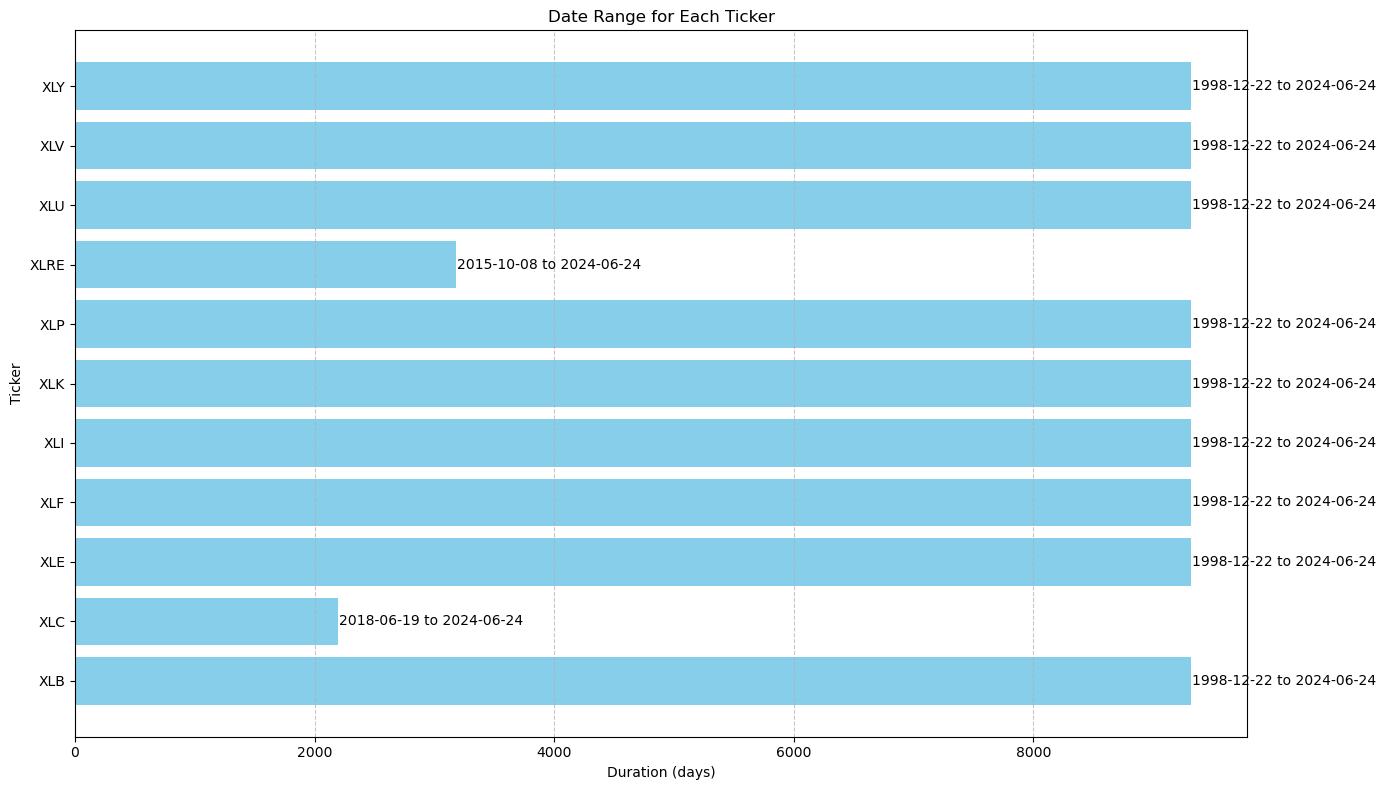

Date ranges for each ticker:
   ticker        min        max  duration
0     XLB 1998-12-22 2024-06-24      9316
1     XLC 2018-06-19 2024-06-24      2197
2     XLE 1998-12-22 2024-06-24      9316
3     XLF 1998-12-22 2024-06-24      9316
4     XLI 1998-12-22 2024-06-24      9316
5     XLK 1998-12-22 2024-06-24      9316
6     XLP 1998-12-22 2024-06-24      9316
7    XLRE 2015-10-08 2024-06-24      3182
8     XLU 1998-12-22 2024-06-24      9316
9     XLV 1998-12-22 2024-06-24      9316
10    XLY 1998-12-22 2024-06-24      9316


In [8]:
# Data visualisation on data structure
# converting 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Group by ticker and find the min and max dates for each ticker
date_ranges = data.groupby('ticker')['date'].agg(['min', 'max']).reset_index()

# Calculate the duration of each date range
date_ranges['duration'] = (date_ranges['max'] - date_ranges['min']).dt.days

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.barh(date_ranges['ticker'], date_ranges['duration'], color='skyblue')
plt.xlabel('Duration (days)')
plt.ylabel('Ticker')
plt.title('Date Range for Each Ticker')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotation of the plot graph
for bar, start, end in zip(bars, date_ranges['min'], date_ranges['max']):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
             f'{start.date()} to {end.date()}',
             va='center', ha='left', color='black')

plt.tight_layout()

# Plot display
plt.show()

# display daterange of each ticker
print("Date ranges for each ticker:")
print(date_ranges)

In [9]:
data['date'] = pd.to_datetime(data['date'])

# to identify the common range
# Find the minimum and maximum date for each ticker
min_dates = data.groupby('ticker')['date'].min()
max_dates = data.groupby('ticker')['date'].max()

# Find the overall minimum and maximum dates
overall_min_date = min_dates.max()
overall_max_date = max_dates.min()

print("Common date range:")
print("Start date:", overall_min_date)
print("End date:", overall_max_date)
# Find the minimum and maximum date for each ticker
min_dates = data.groupby('ticker')['date'].min()
max_dates = data.groupby('ticker')['date'].max()

# Find the overall minimum and maximum dates
overall_min_date = min_dates.max()
overall_max_date = max_dates.min()

print("Common date range:")
print("Start date:", overall_min_date)
print("End date:", overall_max_date)

Common date range:
Start date: 2018-06-19 00:00:00
End date: 2024-06-24 00:00:00
Common date range:
Start date: 2018-06-19 00:00:00
End date: 2024-06-24 00:00:00


In [10]:
# Filter the data with the common date range
data_subset = data[(data['date'] >= overall_min_date) & (data['date'] <= overall_max_date)]

#reset the index
data_subset.reset_index(drop=True, inplace=True)

# to check the new datset date range:
# Find the minimum and maximum dates
min_date = data_subset['date'].min()
max_date = data_subset['date'].max()

print("Date Range:")
print("Start date:", min_date)
print("End date:", max_date)

Date Range:
Start date: 2018-06-19 00:00:00
End date: 2024-06-24 00:00:00


In [11]:
# cross check on undefined values
data_subset.isna().sum().sum()

0

In [12]:

# set dataframe
data_subset = pd.DataFrame(data_subset)

# Define a function to calculate Z-scores for each group
def calculate_z_scores(group):
    z_scores = stats.zscore(group[['open', 'high', 'low', 'close', 'volume']], ddof=0)
    return pd.DataFrame(z_scores, columns=['open_z', 'high_z', 'low_z', 'close_z', 'volume_z'], index=group.index)

# Apply Z-score calculation within each ticker group
z_scores_df = data_subset.groupby('ticker').apply(calculate_z_scores)

# Flatten the resulting MultiIndex DataFrame and align with the original data
z_scores_df = z_scores_df.reset_index(level=0, drop=True)

# Merge Z-scores with the original DataFrame
data_subset = pd.concat([data_subset, z_scores_df], axis=1)

# Calculate absolute Z-scores
data_subset[['open_z', 'high_z', 'low_z', 'close_z', 'volume_z']] = data_subset[['open_z', 'high_z', 'low_z', 'close_z', 'volume_z']].abs()

# Defining the threshold
threshold = 3

# Identify the respective anomalies
data_subset['anomalies'] = (data_subset[['open_z', 'high_z', 'low_z', 'close_z', 'volume_z']] > threshold).any(axis=1)

# Count occurrences of anomalies
counts = data_subset['anomalies'].value_counts()

# Display the counts
print(counts)

anomalies
False    16643
Name: count, dtype: int64


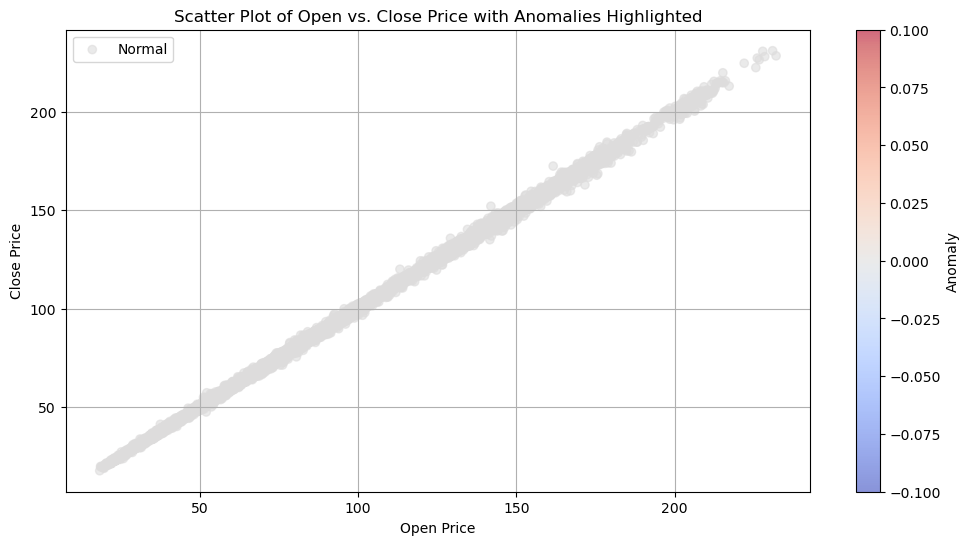

In [13]:
# Scatter plot of 'open' vs. 'close' with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.scatter(data_subset['open'], data_subset['close'], c=data_subset['anomalies'], cmap='coolwarm', label='Anomaly', alpha=0.6)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Open vs. Close Price with Anomalies Highlighted')
plt.legend(['Normal', 'Anomaly'])
plt.grid(True)
plt.colorbar(label='Anomaly')
plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler
# Normalize OHCLV data
scaler = MinMaxScaler()
data_subset[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(data_subset[['open', 'high', 'low', 'close', 'volume']])


In [15]:
# Calculate moving averages for each sector
data_subset['SMA_50'] = data_subset.groupby('sector')['close'].transform(lambda x: x.rolling(window=50).mean())
data_subset['EMA_50'] = data_subset.groupby('sector')['close'].transform(lambda x: x.ewm(span=50, adjust=False).mean())

# Calculate sector performance based on moving averages
data_subset['SMA_signal'] = data_subset['close'] > data_subset['SMA_50']
data_subset['EMA_signal'] = data_subset['close'] > data_subset['EMA_50']

In [16]:
# Default check datetime format for date column
data_subset['date'] = pd.to_datetime(data_subset['date'])

# Set 'date' as index for resampling
data_subset.set_index('date', inplace=True)

# Calculate daily returns
data_subset['daily_return'] = data_subset.groupby('sector')['close'].pct_change()

# Resample to monthly and yearly frequencies
monthly_returns = data_subset.groupby('sector')['close'].resample('M').ffill().pct_change()
yearly_returns = data_subset.groupby('sector')['close'].resample('Y').ffill().pct_change()

# calculate for different returns
def calculate_periodic_returns(df, period):
    return df.groupby('sector')['close'].resample(period).ffill().pct_change()

# Calculate 5, 10, 15, and 20 year returns
y5_returns = calculate_periodic_returns(data_subset, '5Y')
y10_returns = calculate_periodic_returns(data_subset, '10Y')
y15_returns = calculate_periodic_returns(data_subset, '15Y')
y20_returns = calculate_periodic_returns(data_subset, '20Y')

# Converting to dataframes datatype
monthly_returns = monthly_returns.reset_index(name='monthly_return')
yearly_returns = yearly_returns.reset_index(name='yearly_return')
y5_returns = y5_returns.reset_index(name='y5_return')
y10_returns = y10_returns.reset_index(name='y10_return')
y15_returns = y15_returns.reset_index(name='y15_return')
y20_returns = y20_returns.reset_index(name='y20_return')

# Merging to original dataframe
data_subset.reset_index(inplace=True)
data_subset = data_subset.merge(monthly_returns, on=['sector', 'date'], how='left')
data_subset = data_subset.merge(yearly_returns, on=['sector', 'date'], how='left')
data_subset = data_subset.merge(y5_returns, on=['sector', 'date'], how='left')
data_subset = data_subset.merge(y10_returns, on=['sector', 'date'], how='left')
data_subset = data_subset.merge(y15_returns, on=['sector', 'date'], how='left')
data_subset = data_subset.merge(y20_returns, on=['sector', 'date'], how='left')

#Display the modified dataset
data_subset.head()

date ticker                  sector      open      high       low  \
0 2018-06-19    XLC  Communication Services  0.146023  0.146971  0.150604   
1 2018-06-20    XLC  Communication Services  0.149524  0.150841  0.154684   
2 2018-06-21    XLC  Communication Services  0.151018  0.150659  0.153512   
3 2018-06-22    XLC  Communication Services  0.150178  0.149539  0.153465   
4 2018-06-25    XLC  Communication Services  0.148497  0.147765  0.147954   

      close    volume  open_z  high_z  ...    EMA_50  SMA_signal  EMA_signal  \
0  0.151058  0.000000     NaN     NaN  ...  0.151058       False       False   
1  0.153955  0.000676     NaN     NaN  ...  0.151171       False        True   
2  0.152506  0.001607     NaN     NaN  ...  0.151224       False        True   
3  0.153535  0.000643     NaN     NaN  ...  0.151314       False        True   
4  0.148674  0.009719     NaN     NaN  ...  0.151211       False       False   

   daily_return  monthly_return  yearly_return  y5_return  y10_return  \
0           NaN             NaN            NaN        NaN         NaN   
1      0.019181             NaN            NaN        NaN         NaN   
2     -0.009410             NaN            NaN        NaN         NaN   
3      0.006742             NaN            NaN        NaN         NaN   
4     -0.031656             NaN            NaN        NaN         NaN   

   y15_return  y20_return  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

[5 rows x 25 columns]

In [17]:
# cross validationg on nan values
data_subset.isna().sum()

date                  0
ticker                0
sector                0
open                  0
high                  0
low                   0
close                 0
volume                0
open_z            16643
high_z            16643
low_z             16643
close_z           16643
volume_z          16643
anomalies             0
SMA_50              539
EMA_50                0
SMA_signal            0
EMA_signal            0
daily_return         11
monthly_return    16082
yearly_return     16600
y5_return         16633
y10_return        16633
y15_return        16633
y20_return        16633
dtype: int64

In [18]:
# Forward and backward imputation on missing values
data_subset['daily_return'] = data_subset['daily_return'].fillna(method='ffill').fillna(method='bfill')
data_subset['monthly_return'] = data_subset['monthly_return'].fillna(method='ffill').fillna(method='bfill')
data_subset['yearly_return'] = data_subset['yearly_return'].fillna(method='ffill').fillna(method='bfill')
data_subset['y5_return'] = data_subset['y5_return'].fillna(method='ffill').fillna(method='bfill')
data_subset['y10_return'] = data_subset['y10_return'].fillna(method='ffill').fillna(method='bfill')
data_subset['y15_return'] = data_subset['y15_return'].fillna(method='ffill').fillna(method='bfill')
data_subset['y20_return'] = data_subset['y20_return'].fillna(method='ffill').fillna(method='bfill')


# Replace NaN values with 0 for the specified columns
nan_col = ['open_z', 'high_z', 'low_z', 'close_z', 'volume_z','SMA_50']

data_subset[nan_col] = data_subset[nan_col].fillna(0)

# Verify the imputation has impacted the dataset
print(data_subset[nan_col].isna().sum())

open_z      0
high_z      0
low_z       0
close_z     0
volume_z    0
SMA_50      0
dtype: int64


In [19]:
data_subset.isna().sum().sum()

0

In [20]:
data_subset.head(1)

date ticker                  sector      open      high       low  \
0 2018-06-19    XLC  Communication Services  0.146023  0.146971  0.150604   

      close  volume  open_z  high_z  ...    EMA_50  SMA_signal  EMA_signal  \
0  0.151058     0.0     0.0     0.0  ...  0.151058       False       False   

   daily_return  monthly_return  yearly_return  y5_return  y10_return  \
0      0.019181       -0.033549        0.52235   0.204681    0.204681   

   y15_return  y20_return  
0    0.204681    0.204681  

[1 rows x 25 columns]

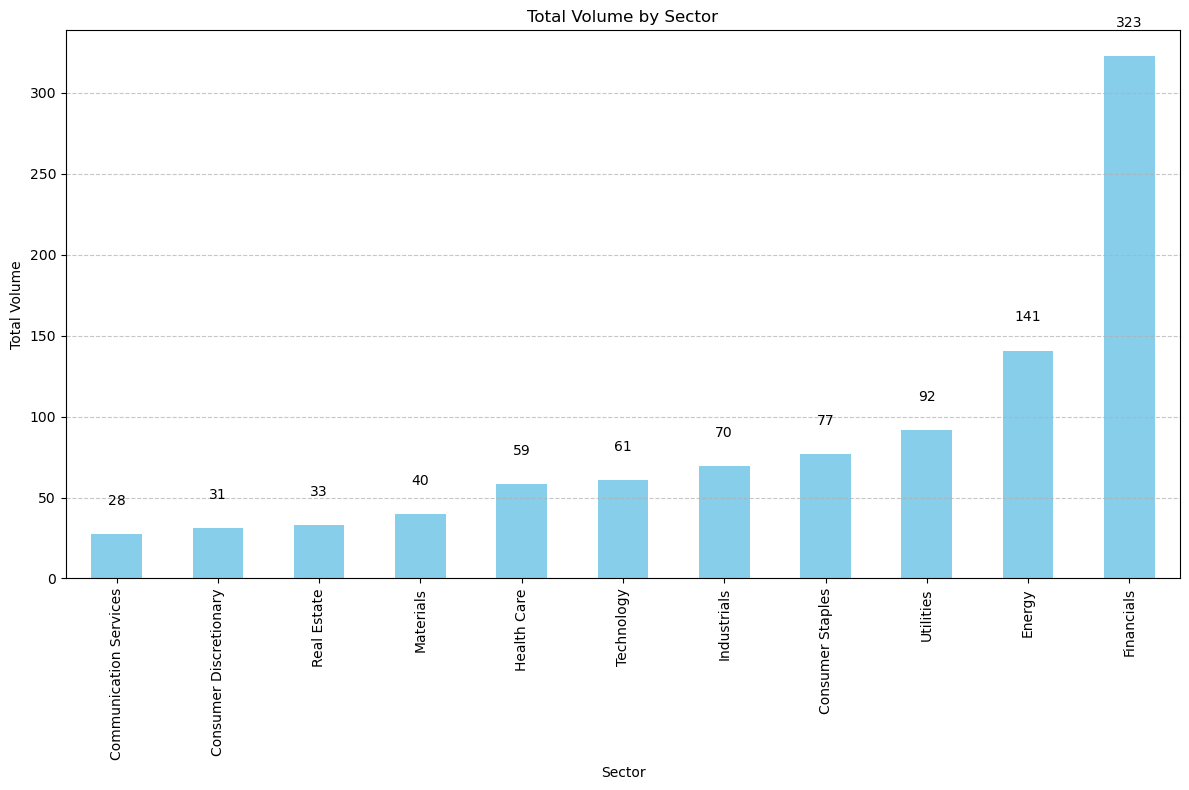

In [21]:
# Visualisation of volumes column from OHLCV data
sector_volume = data_subset.groupby('sector')['volume'].sum().sort_values()

# Creating a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the volume for each sector
sector_volume.plot(kind='bar', color='skyblue', ax=ax)

# Set label, title and plots
ax.set_xlabel('Sector')
ax.set_ylabel('Total Volume')
ax.set_title('Total Volume by Sector')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotation of plot
for i, value in enumerate(sector_volume):
    ax.text(i, value + 0.05 * max(sector_volume), f'{value:.0f}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


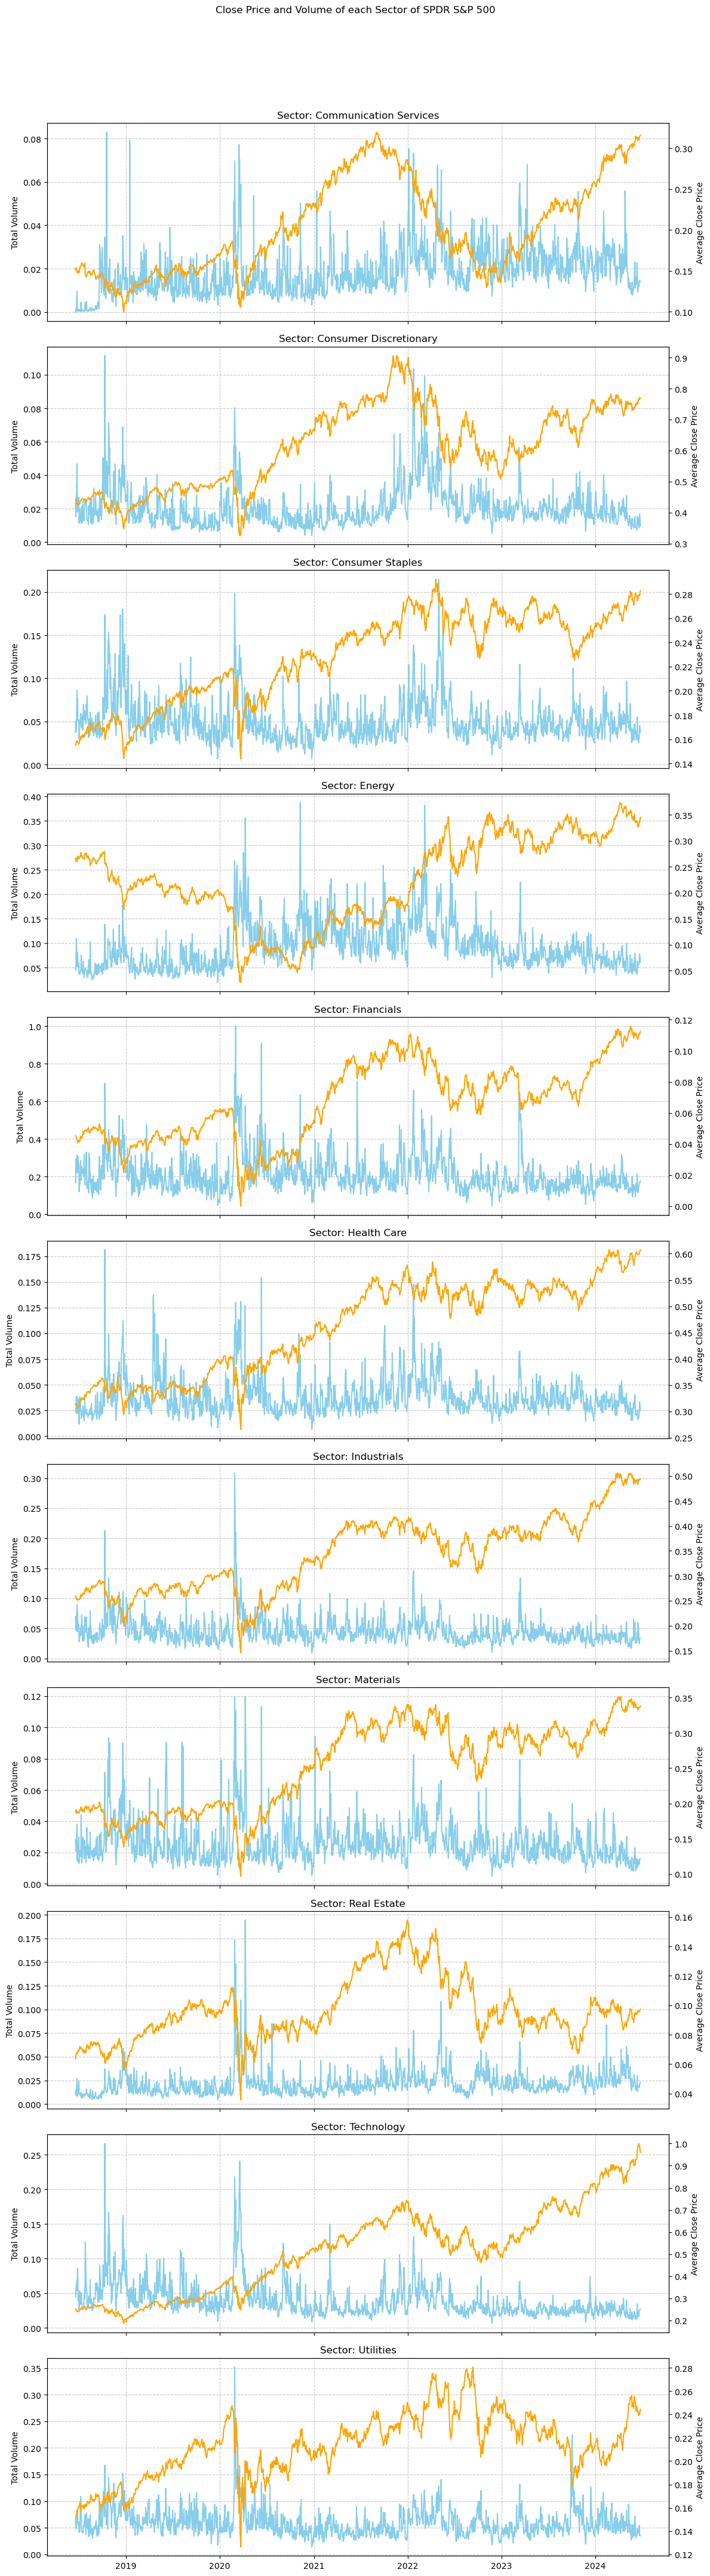

In [22]:
# Default check on datetime format of date column
data_subset['date'] = pd.to_datetime(data_subset['date'])

# Aggregate both volume and close price and group by each sectors
sector_time_series = data_subset.groupby(['sector', 'date']).agg({
    'volume': 'sum',
    'close': 'mean'
}).reset_index()

# Listing the 11 sectors
sectors = sector_time_series['sector'].unique()

# Creating subplotsfor each sector
fig, axes = plt.subplots(nrows=len(sectors), ncols=1, figsize=(12, 4 * len(sectors)), sharex=True)

if len(sectors) == 1:
    axes = [axes]

# Set loop for each sector and create a time series plot for both volume and close price
for i, sector in enumerate(sectors):
    ax1 = axes[i]
    
    # Filter the sectors from the data
    sector_data = sector_time_series[sector_time_series['sector'] == sector]
    
    # Plot Volume on primary y-axis
    ax1.plot(sector_data['date'], sector_data['volume'], color='skyblue', label='Volume')
    ax1.set_ylabel('Total Volume', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    
    # plot close price on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(sector_data['date'], sector_data['close'], color='orange', label='Close Price')
    ax2.set_ylabel('Average Close Price', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    
    # title for each subplot as the sector name
    ax1.set_title(f'Sector: {sector}')
    
    # Add gridlines
    ax1.grid(axis='both', linestyle='--', alpha=0.7)

# label main title to the figure
fig.suptitle('Close Price and Volume of each Sector of SPDR S&P 500', fontsize=12)

# Set the x-axis label
plt.xlabel('Date')

# Adjust layout to fit subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to not overlap with the suptitle

# Display the plot
plt.show()




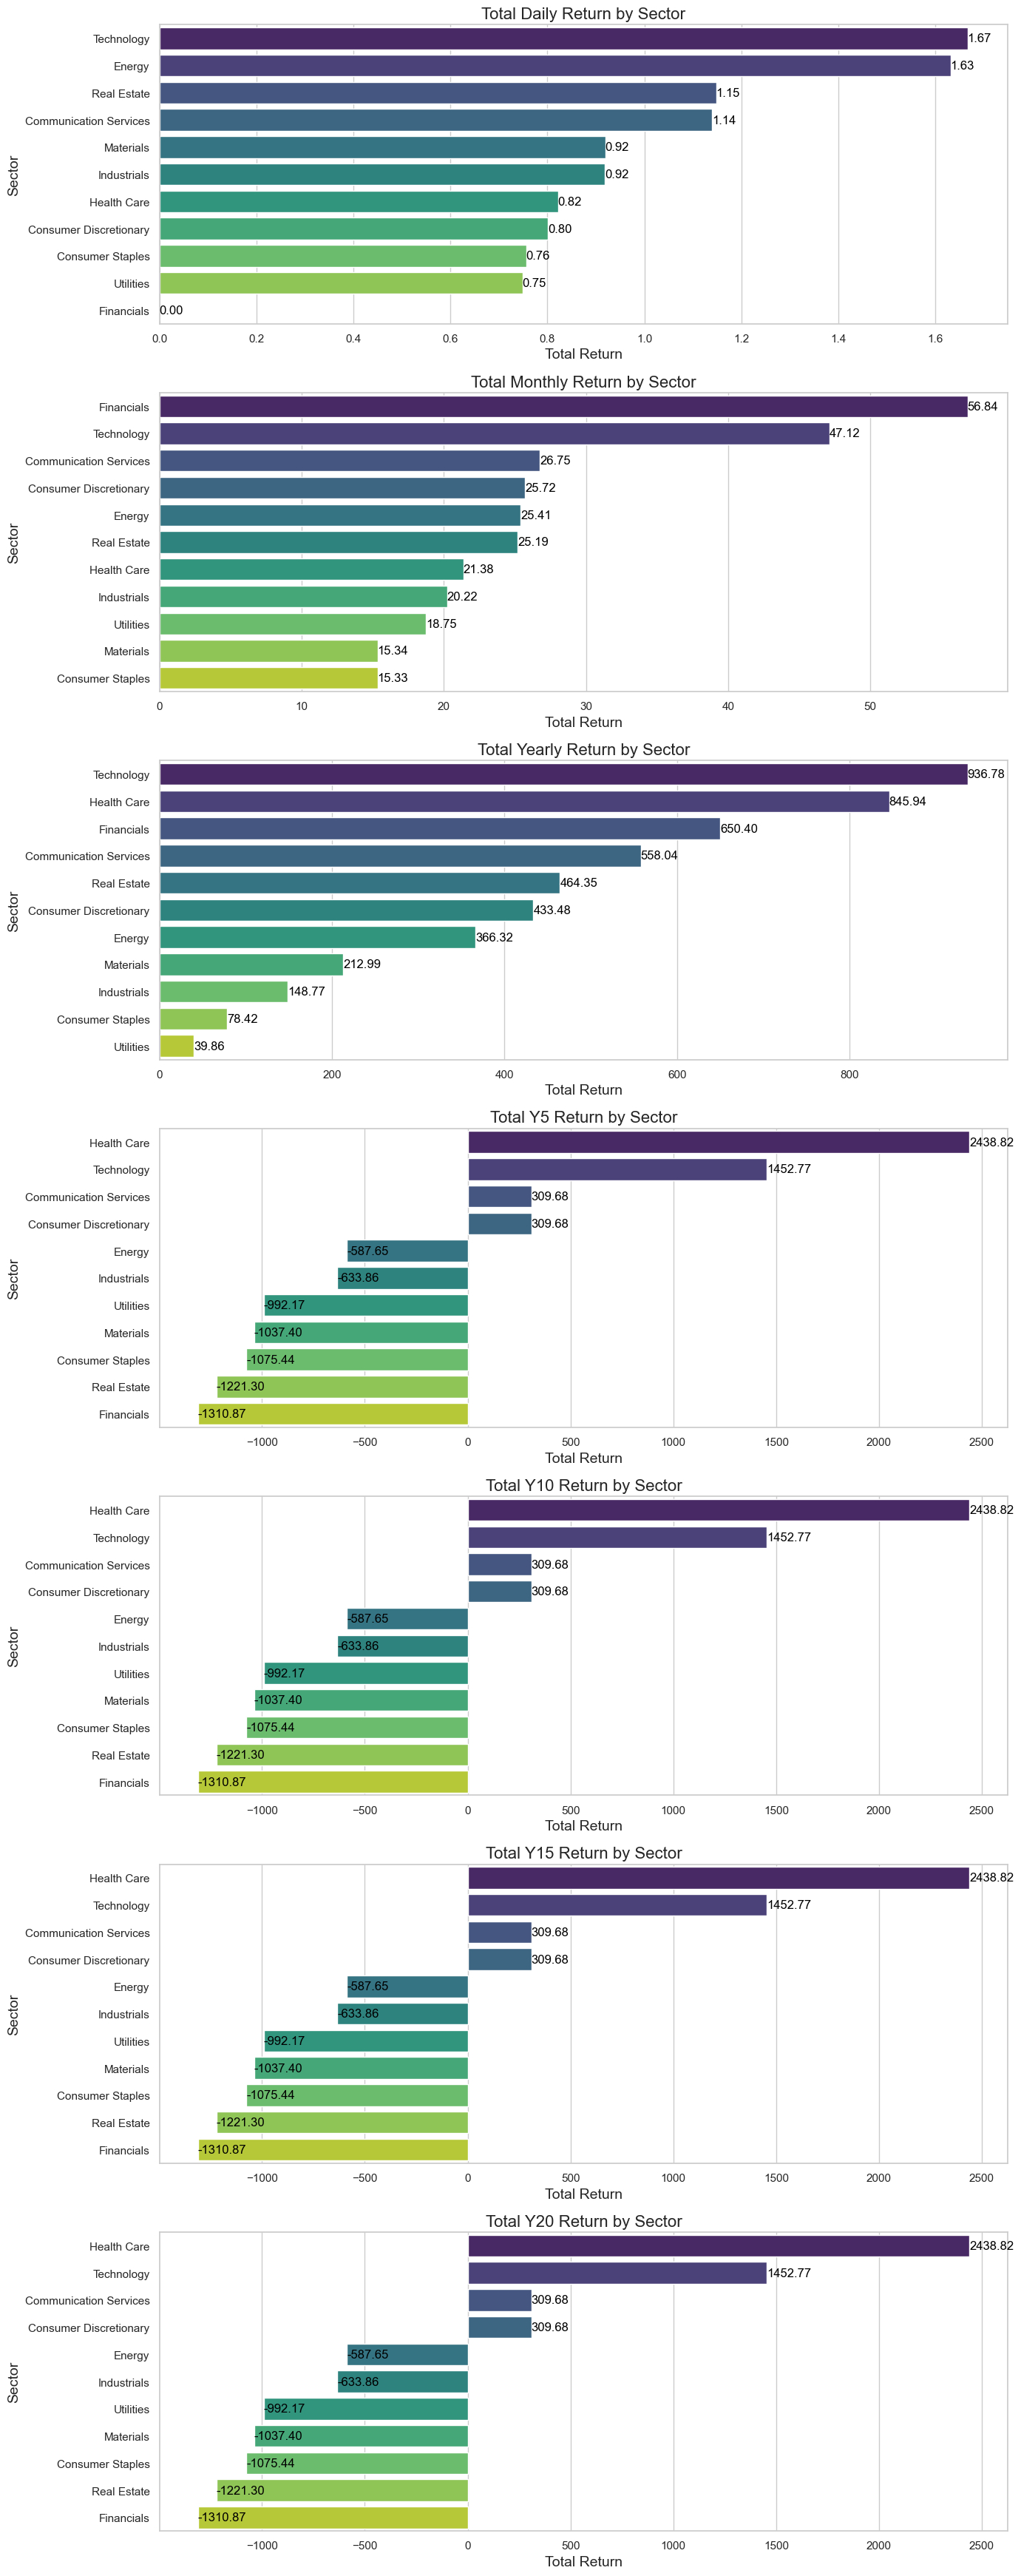

In [23]:
# Set the visual style
sns.set(style="whitegrid")

# Columns to visualise
return_types = ['daily_return', 'monthly_return', 'yearly_return', 'y5_return', 'y10_return', 'y15_return', 'y20_return']

# Create a figure and axes for subplots
fig, axs = plt.subplots(len(return_types), 1, figsize=(14, 35))

# Plot each type of return for all sectors
for i, return_type in enumerate(return_types):
    # sum of returns
    return_sums = data_subset.groupby('sector')[return_type].sum().reset_index()
    
    # handling Nan values
    return_sums[return_type] = return_sums[return_type].replace([np.inf, -np.inf], np.nan).fillna(0)
    
    # Sorting the returns sectorwise
    return_sums = return_sums.sort_values(by=return_type, ascending=False)
    
    # Barplot initate
    sns.barplot(x=return_type, y='sector', data=return_sums, ax=axs[i], palette='viridis')
    
    # Adding annotations
    for index, value in enumerate(return_sums[return_type]):
        if np.isfinite(value):  # Only annotate finite values
            axs[i].text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=12)

    # Set title and labels
    axs[i].set_title(f'Total {return_type.replace("_", " ").title()} by Sector', fontsize=16)
    axs[i].set_xlabel('Total Return', fontsize=14)
    axs[i].set_ylabel('Sector', fontsize=14)

# Adjusting layout
plt.tight_layout()

# Display the plots
plt.show()





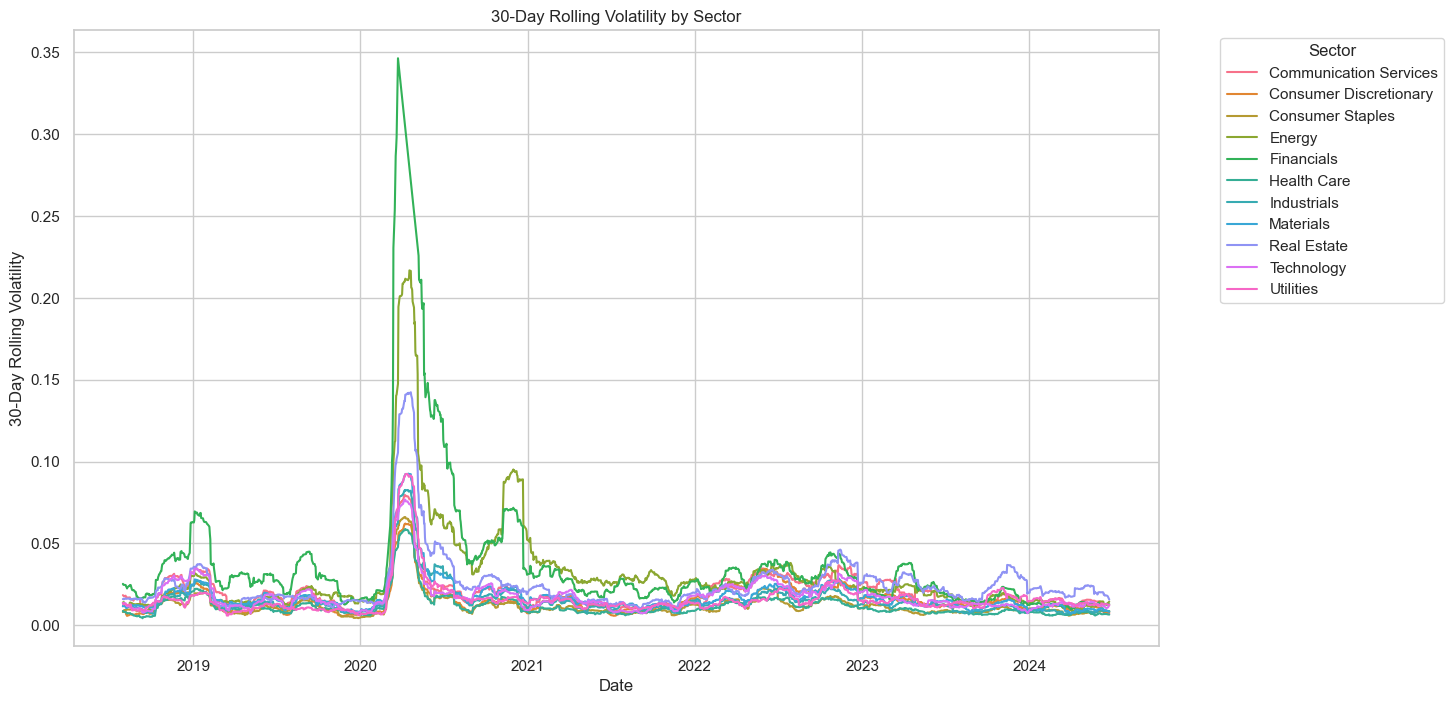

In [24]:
# Calculate 30-day rolling volatility for each sector
data_subset['rolling_volatility_30d'] = data_subset.groupby('sector')['daily_return'].rolling(window=30).std().reset_index(level=0, drop=True)

# Visualize the rolling volatility ofrach sector in composite time series graph
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_subset, x='date', y='rolling_volatility_30d', hue='sector')
plt.title('30-Day Rolling Volatility by Sector')
plt.xlabel('Date')
plt.ylabel('30-Day Rolling Volatility')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [25]:
#HAndling missing /undefined values of rolling_volatility_30d column
data_subset['rolling_volatility_30d'] = data_subset['rolling_volatility_30d'].fillna(method='ffill').fillna(method='bfill')

In [26]:
# validating the imputted method
data_subset.isna().sum()

date                      0
ticker                    0
sector                    0
open                      0
high                      0
low                       0
close                     0
volume                    0
open_z                    0
high_z                    0
low_z                     0
close_z                   0
volume_z                  0
anomalies                 0
SMA_50                    0
EMA_50                    0
SMA_signal                0
EMA_signal                0
daily_return              0
monthly_return            0
yearly_return             0
y5_return                 0
y10_return                0
y15_return                0
y20_return                0
rolling_volatility_30d    0
dtype: int64

In [27]:
#Displaythe modified dataset
data_subset.head()

date ticker                  sector      open      high       low  \
0 2018-06-19    XLC  Communication Services  0.146023  0.146971  0.150604   
1 2018-06-20    XLC  Communication Services  0.149524  0.150841  0.154684   
2 2018-06-21    XLC  Communication Services  0.151018  0.150659  0.153512   
3 2018-06-22    XLC  Communication Services  0.150178  0.149539  0.153465   
4 2018-06-25    XLC  Communication Services  0.148497  0.147765  0.147954   

      close    volume  open_z  high_z  ...  SMA_signal  EMA_signal  \
0  0.151058  0.000000     0.0     0.0  ...       False       False   
1  0.153955  0.000676     0.0     0.0  ...       False        True   
2  0.152506  0.001607     0.0     0.0  ...       False        True   
3  0.153535  0.000643     0.0     0.0  ...       False        True   
4  0.148674  0.009719     0.0     0.0  ...       False       False   

   daily_return  monthly_return  yearly_return  y5_return  y10_return  \
0      0.019181       -0.033549        0.52235   0.204681    0.204681   
1      0.019181       -0.033549        0.52235   0.204681    0.204681   
2     -0.009410       -0.033549        0.52235   0.204681    0.204681   
3      0.006742       -0.033549        0.52235   0.204681    0.204681   
4     -0.031656       -0.033549        0.52235   0.204681    0.204681   

   y15_return  y20_return  rolling_volatility_30d  
0    0.204681    0.204681                0.018447  
1    0.204681    0.204681                0.018447  
2    0.204681    0.204681                0.018447  
3    0.204681    0.204681                0.018447  
4    0.204681    0.204681                0.018447  

[5 rows x 26 columns]

Starting RandomizedSearchCV fitting for target variable 'y5_return'...
RandomizedSearchCV fitting complete.
Target: y5_return
Cross-Validation MSE: 0.0010351303152320089
Test MSE: 0.00037636794299031264
Test R² Score: 0.999508063185666
Starting RandomizedSearchCV fitting for target variable 'y10_return'...
RandomizedSearchCV fitting complete.
Target: y10_return
Cross-Validation MSE: 0.0010737501102775727
Test MSE: 0.0003319012448917837
Test R² Score: 0.9995661839853088
Starting RandomizedSearchCV fitting for target variable 'y15_return'...
RandomizedSearchCV fitting complete.
Target: y15_return
Cross-Validation MSE: 0.0012251427641713122
Test MSE: 0.00041772791842443937
Test R² Score: 0.9994540030699337
Starting RandomizedSearchCV fitting for target variable 'y20_return'...
RandomizedSearchCV fitting complete.
Target: y20_return
Cross-Validation MSE: 0.001081645671748073
Test MSE: 0.00033481911313648253
Test R² Score: 0.9995623701461239
       Target  Test MSE  Test R² Score  Cross-Val

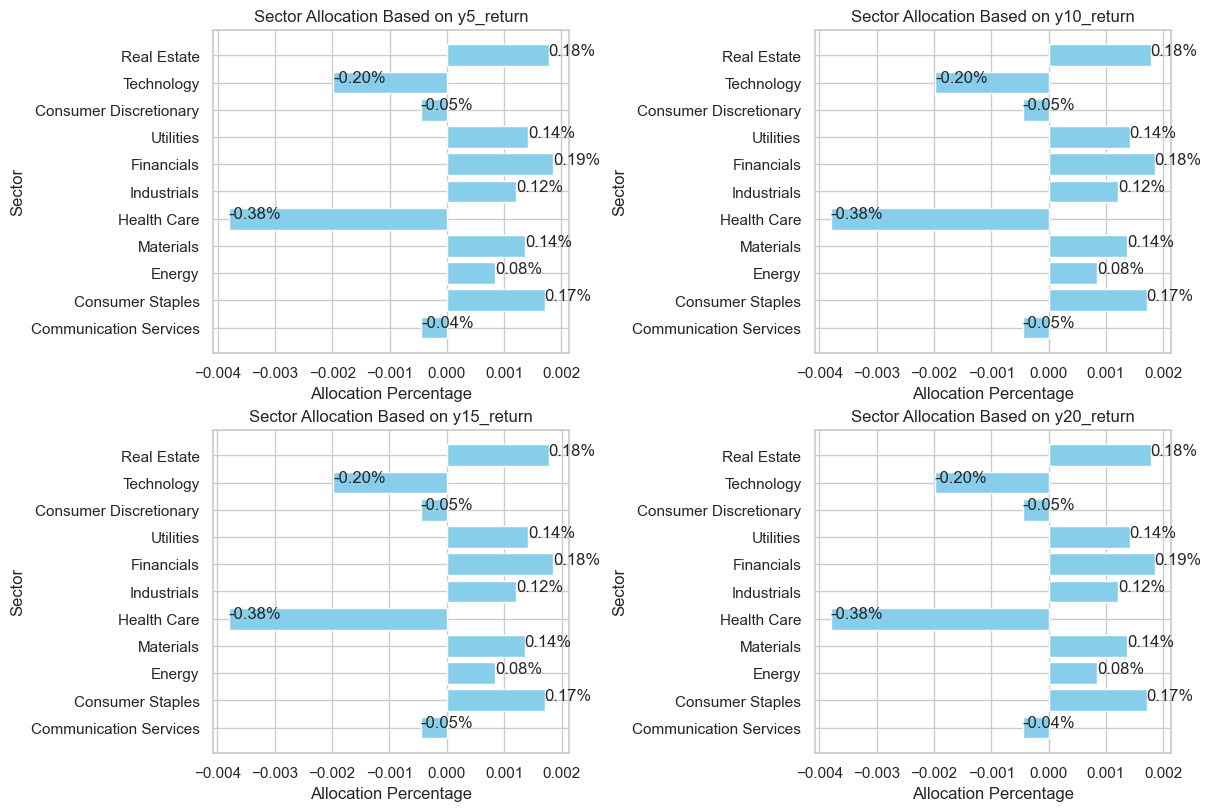

In [59]:

# Random Forest regressor(OHLCV data)

#Defining a function to traing and test the data
def train_and_evaluate(target_variable):
    # Handle missing and infinite values
    data_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
    data_subset.fillna(0, inplace=True)
    # Define the features and target variables
    features = ['open', 'high', 'low', 'close', 'volume', 'open_z', 'high_z', 'low_z', 'close_z', 'volume_z',
                'EMA_50', 'SMA_signal', 'EMA_signal', 'daily_return', 'monthly_return', 'yearly_return', 'rolling_volatility_30d']
    target = target_variable

    X = data_subset[features]
    y = data_subset[target]
    #Splitting the data as train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #Setting the pipeline with scaling , hyperparameter tuning 
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestRegressor())
    ])

    param_distributions = {
        'rf__n_estimators': [100, 200, 300],
        'rf__max_depth': [None, 10, 20, 30],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4],
        'rf__bootstrap': [True, False]
    }
    # parameter set for randomsearch cross validation
    random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

    print(f"Starting RandomizedSearchCV fitting for target variable '{target}'...")
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV fitting complete.")

    best_rf = random_search.best_estimator_

    # Cross-Validation MSE determined
    cv_mse_scores = cross_val_score(best_rf, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    avg_cv_mse = -np.mean(cv_mse_scores)

    # Model Evaluation on Test Set
    y_test_pred = best_rf.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    #Display of model results
    print(f"Target: {target}")
    print(f"Cross-Validation MSE: {avg_cv_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Test R² Score: {test_r2}")
    print("========================================")

    # Extracting sectors from test data and return the predictions and metrics
    sectors = data_subset.loc[X_test.index, 'sector'] 
    return y_test_pred, sectors, test_mse, test_r2, avg_cv_mse

# Target variables are selected
targets = ['y5_return', 'y10_return', 'y15_return', 'y20_return']

# Loop to determine the metrics
predictions = {}
metrics = []
for target in targets:
    preds, sectors, test_mse, test_r2, avg_cv_mse = train_and_evaluate(target)
    predictions[target] = pd.DataFrame({'Predicted_Return': preds, 'Sector': sectors})
    metrics.append((target, test_mse, test_r2, avg_cv_mse))

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Target', 'Test MSE', 'Test R² Score', 'Cross-Validation MSE'])
print(metrics_df)

# Calculating sector allocations for selected target variable
for target, df in predictions.items():
    df['Allocation'] = df.groupby('Sector')['Predicted_Return'].transform(lambda x: x.sum())  # Sum the returns by sector
    df['Allocation'] = df['Allocation'] / df['Allocation'].sum()  # Normalize to get allocation percentages
    predictions[target] = df.drop_duplicates(subset='Sector')[['Sector', 'Allocation']].reset_index(drop=True)

# Plot the return allocations of each sector
plt.figure(figsize=(12, 8), constrained_layout=True)
for i, target in enumerate(targets):
    plt.subplot(2, 2, i+1)
    df = predictions[target]
    plt.barh(df['Sector'], df['Allocation'], color='skyblue')
    plt.xlabel('Allocation Percentage')
    plt.ylabel('Sector')
    plt.title(f'Sector Allocation Based on {target}')
    plt.grid(True)

    # Annotation of the graph
    for index, value in enumerate(df['Allocation']):
        plt.text(value, index, f"{value:.2%}")
#display the graph
plt.show()




Starting RandomizedSearchCV fitting for target variable 'y5_return'...
RandomizedSearchCV fitting complete.
Target: y5_return
Cross-Validation MSE: 0.00498527744009149
Test MSE: 0.004438986631341813
Test R² Score: 0.9941979624381834
Starting RandomizedSearchCV fitting for target variable 'y10_return'...
RandomizedSearchCV fitting complete.
Target: y10_return
Cross-Validation MSE: 0.004989960706838731
Test MSE: 0.004431170076500231
Test R² Score: 0.9942081791719924
Starting RandomizedSearchCV fitting for target variable 'y15_return'...
RandomizedSearchCV fitting complete.
Target: y15_return
Cross-Validation MSE: 0.004987137318575303
Test MSE: 0.0044295180891515485
Test R² Score: 0.9942103384244175
Starting RandomizedSearchCV fitting for target variable 'y20_return'...
RandomizedSearchCV fitting complete.
Target: y20_return
Cross-Validation MSE: 0.004994912311324852
Test MSE: 0.004429535460242365
Test R² Score: 0.9942103157192982
       Target  Test MSE  Test R² Score  Cross-Validation M

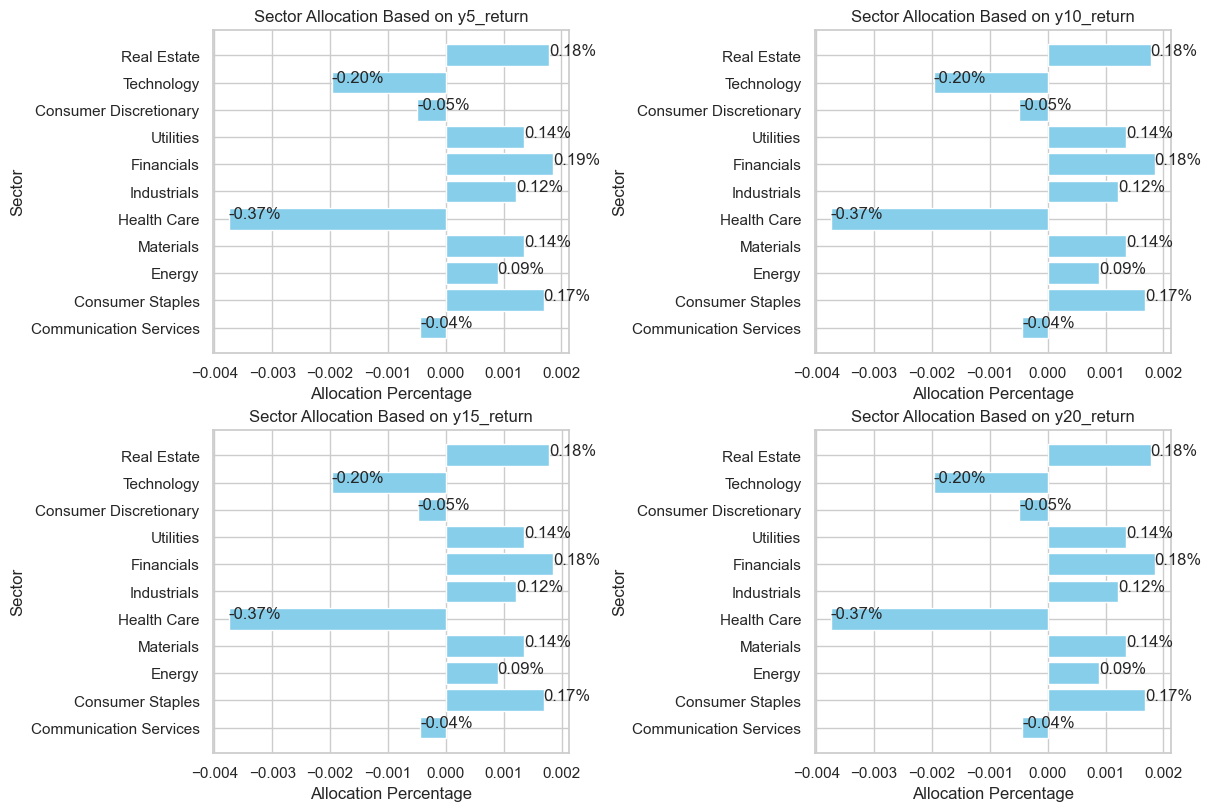

In [61]:
#Gradient Boosting Regressor (OHLCV data)

# Defining a function to train and test the data
def train_and_evaluate(target_variable):
    # Handle missing and infinite values
    data_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
    data_subset.fillna(0, inplace=True)
    # Define feature and target variables
    features = ['open', 'high', 'low', 'close', 'volume', 'open_z', 'high_z', 'low_z', 'close_z', 'volume_z',
                'EMA_50', 'SMA_signal', 'EMA_signal', 'daily_return', 'monthly_return', 'yearly_return', 'rolling_volatility_30d']
    target = target_variable

    X = data_subset[features]
    y = data_subset[target]
    #Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #Set the pipelines for hyperparameter tuning
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('gbr', GradientBoostingRegressor())
    ])

    param_distributions = {
        'gbr__n_estimators': [100, 200, 300],
        'gbr__learning_rate': [0.01, 0.1, 0.05],
        'gbr__max_depth': [3, 4, 5],
        'gbr__min_samples_split': [2, 5, 10]
    }
    #Randomised search cross validation
    random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions, n_iter=10, cv=7, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    #Display the Status of randomised search CV
    print(f"Starting RandomizedSearchCV fitting for target variable '{target}'...")
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV fitting complete.")

    best_gbr = random_search.best_estimator_

    # Cross-Validation MSE
    cv_mse_scores = cross_val_score(best_gbr, X_train, y_train, cv=7, scoring='neg_mean_squared_error', n_jobs=-1)
    avg_cv_mse = -np.mean(cv_mse_scores)

    # Model Evaluation on Test Set
    y_test_pred = best_gbr.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    #displaythe metrics
    print(f"Target: {target}")
    print(f"Cross-Validation MSE: {avg_cv_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Test R² Score: {test_r2}")
    print("========================================")

    # Extract sectors from test set and respective return predictions and metrics
    sectors = data_subset.loc[X_test.index, 'sector']
    return y_test_pred, sectors, test_mse, test_r2, avg_cv_mse

# target variables asigned
targets = ['y5_return', 'y10_return', 'y15_return', 'y20_return']

# Collating the model metrics and output
predictions = {}
metrics = []
for target in targets:
    preds, sectors, test_mse, test_r2, avg_cv_mse = train_and_evaluate(target)
    predictions[target] = pd.DataFrame({'Predicted_Return': preds, 'Sector': sectors})
    metrics.append((target, test_mse, test_r2, avg_cv_mse))

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Target', 'Test MSE', 'Test R² Score', 'Cross-Validation MSE'])
print(metrics_df)

# Calculate sector allocations for each target period
for target, df in predictions.items():
    df['Allocation'] = df.groupby('Sector')['Predicted_Return'].transform(lambda x: x.sum())  # Sum the returns by sector
    df['Allocation'] = df['Allocation'] / df['Allocation'].sum()  # Normalize to get allocation percentages
    predictions[target] = df.drop_duplicates(subset='Sector')[['Sector', 'Allocation']].reset_index(drop=True)

# Plot sector allocations for each period
plt.figure(figsize=(12, 8), constrained_layout=True)
for i, target in enumerate(targets):
    plt.subplot(2, 2, i+1)
    df = predictions[target]
    plt.barh(df['Sector'], df['Allocation'], color='skyblue')
    plt.xlabel('Allocation Percentage')
    plt.ylabel('Sector')
    plt.title(f'Sector Allocation Based on {target}')
    plt.grid(True)

    # Annotationof sector allocation percentage
    for index, value in enumerate(df['Allocation']):
        plt.text(value, index, f"{value:.2%}")
#display the graph
plt.show()


In [28]:
#Import the second data (Inflation rates from world bank repository)
data2=pd.read_csv(r"Inflation rate.csv")
data2=data2.dropna(how='all')
data2= data2.dropna(axis=1, how='all')
data2.head()
#Data preprocessing - Inflation rates dataset
# removing least important columns
data2 = data2.drop(columns=['Series Name', 'Series Code', 'Time Code'])
data2= data2.drop([28,29])

# total nan values
nan_values=data2.isna().sum().sum()
nan_values
# column wise nan values (nan values for each country)
nan_col = data2.isna().sum()
nan_col

# row wise bnan values(nan values for each year across countries)
nan_row = data2.isna().sum(axis=1)


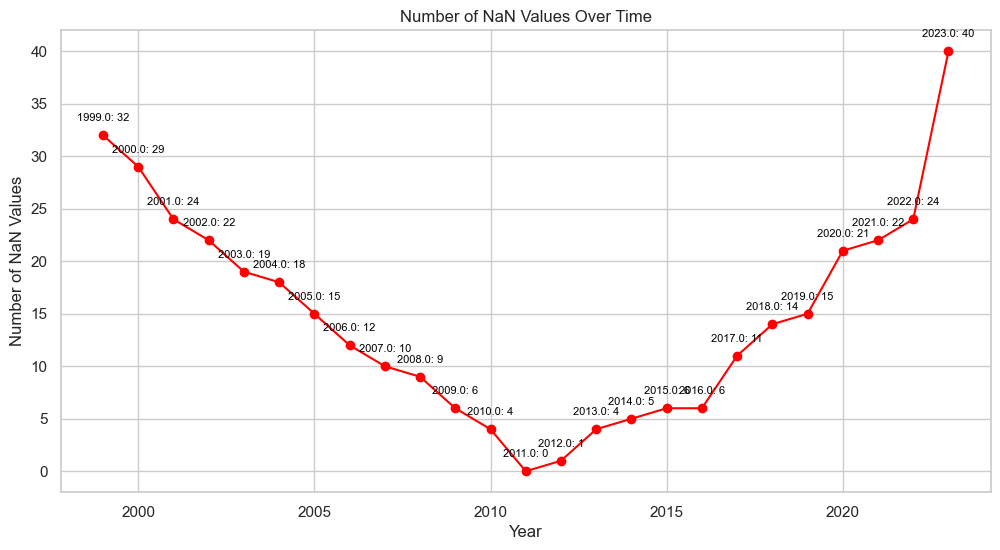

In [29]:
#Visualisation of nan values in dataset
time_column = data2['Time']

# Creating the plot
plt.figure(figsize=(12, 6))
plt.plot(time_column, nan_row, marker='o', linestyle='-', color='red')

plt.title("Number of NaN Values Over Time")
plt.xlabel("Year")
plt.ylabel("Number of NaN Values")
plt.grid(True)

# Annotation of years and respective count of nan values to determine the suitable imputation  method
for i in range(len(time_column)):
    plt.annotate(f'{time_column[i]}: {nan_row[i]}', 
                 (time_column[i], nan_row[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=8, 
                 color='black')
#display the graph
plt.show()

In [30]:
data2['Time'] = data2['Time'].astype(int)
# Impute NaN values in data2cleaned using forward fill and then backward fill
data2= data2.fillna(method='ffill').fillna(method='bfill')

In [31]:
#cross validation of nan values of dataset
data2.isna().sum().sum()

0

In [32]:
# check on the modified dataset
data2.head()

Time  Afghanistan [AFG]  Albania [ALB]  Algeria [DZA]  Angola [AGO]  \
0  1999          12.686269       0.389438       2.645511    248.195902   
1  2000          12.686269       0.050018       0.339163    324.996872   
2  2001          12.686269       3.107588       4.225988    152.561022   
3  2002          12.686269       7.770526       1.418302    108.897436   
4  2003          12.686269       0.484003       4.268954     98.224144   

   Antigua and Barbuda [ATG]  Armenia [ARM]  Aruba [ABW]  Australia [AUS]  \
0                   1.121288       0.648246     2.280372         1.483129   
1                   0.771780      -0.790884     4.044021         4.457435   
2                   1.402797       3.145905     2.883604         4.407135   
3                   2.407658       1.060049     3.315247         2.981575   
4                   1.993531       4.721553     3.656365         2.732596   

   Austria [AUT]  ...  United States [USA]  Uruguay [URY]  Uzbekistan [UZB]  \
0       0.568994  ...             2.188027       5.658688         13.779745   
1       2.344863  ...             3.376857       4.763825         13.779745   
2       2.650001  ...             2.826171       4.359341         13.779745   
3       1.810358  ...             1.586032      13.972473         13.779745   
4       1.355554  ...             2.270095      19.379730         13.779745   

   Vanuatu [VUT]  Venezuela, RB [VEN]  Viet Nam [VNM]  \
0       1.998975            27.080941        4.117102   
1       2.537688            27.080941       -1.710337   
2       3.577555            27.080941       -0.431545   
3       1.963568            27.080941        3.830828   
4       3.016241            27.080941        3.234648   

   West Bank and Gaza [PSE]  Yemen, Rep. [YEM]  Zambia [ZMB]  Zimbabwe [ZWE]  
0                  5.544392           8.660219     26.787697         3.02267  
1                  2.798199           4.590000     26.030412         3.02267  
2                  1.222785          11.911591     21.393782         3.02267  
3                  5.709516          12.238534     22.233345         3.02267  
4                  4.403032          10.832361     21.401578         3.02267  

[5 rows x 193 columns]

In [33]:
data_subset.date

0       2018-06-19
1       2018-06-20
2       2018-06-21
3       2018-06-22
4       2018-06-25
           ...    
16638   2024-06-17
16639   2024-06-18
16640   2024-06-20
16641   2024-06-21
16642   2024-06-24
Name: date, Length: 16643, dtype: datetime64[ns]

In [34]:
# Convert 'Time' column is of int32 dtype for further data preprocssing
data2['Time'] = data2['Time'].astype('int32')

# Filter the DataFrame for years between 2018 and 2023
data2_filtered = data2[(data2['Time'] >= 2018) & (data2['Time'] <= 2023)]

# Verify the filtering
print(f"Start date of data2_filtered: {data2_filtered['Time'].min()}")
print(f"End date of data2_filtered: {data2_filtered['Time'].max()}")
print(f"Length of data2_filtered: {len(data2_filtered)}")






Start date of data2_filtered: 2018
End date of data2_filtered: 2023
Length of data2_filtered: 6


In [35]:
#display the modified dataset
data2_filtered

Time  Afghanistan [AFG]  Albania [ALB]  Algeria [DZA]  Angola [AGO]  \
19  2018           0.626149       2.028060       4.269990     19.628938   
20  2019           2.302373       1.411091       1.951768     17.080954   
21  2020           2.302373       1.620887       2.415131     22.271539   
22  2021           2.302373       2.041472       7.226063     25.754295   
23  2022           2.302373       6.725203       9.265516     21.355290   
24  2023           2.302373       6.725203       9.322174     13.644102   

    Antigua and Barbuda [ATG]  Armenia [ARM]  Aruba [ABW]  Australia [AUS]  \
19                   1.207158       2.520234     3.626041         1.911401   
20                   1.431356       1.443447     4.257462         1.610768   
21                   0.625990       1.211436     4.257462         0.846906   
22                   2.062996       7.184836     4.257462         2.863910   
23                   7.531078       8.640911     4.257462         6.594097   
24                   5.067139       1.980419     4.257462         5.597015   

    Austria [AUT]  ...  United States [USA]  Uruguay [URY]  Uzbekistan [UZB]  \
19       1.998380  ...             2.442583       7.606534         17.524180   
20       1.530896  ...             1.812210       7.881989         14.525736   
21       1.381911  ...             1.233584       9.756406         12.867730   
22       2.766667  ...             4.697859       7.747914         10.849240   
23       8.546870  ...             8.002800       9.104380         11.446644   
24       7.814134  ...             4.116338       5.869104         11.446644   

    Vanuatu [VUT]  Venezuela, RB [VEN]  Viet Nam [VNM]  \
19       2.330964           254.948535        3.539628   
20       2.762520           254.948535        2.795824   
21       5.329351           254.948535        3.220934   
22       2.343284           254.948535        1.834716   
23       6.679306           254.948535        3.156507   
24       6.679306           254.948535        3.252893   

    West Bank and Gaza [PSE]  Yemen, Rep. [YEM]  Zambia [ZMB]  Zimbabwe [ZWE]  
19                 -0.195108           8.104726      7.494572       10.618866  
20                  1.580183           8.104726      9.150316      255.304991  
21                 -0.735332           8.104726     15.733060      557.201817  
22                  1.237481           8.104726     22.020768       98.546105  
23                  3.741224           8.104726     10.993204      104.705171  
24                  5.871102           8.104726     10.884532      104.705171  

[6 rows x 193 columns]

In [36]:
#Display the columns of modified datatset
data2_filtered.columns

Index(['Time', 'Afghanistan [AFG]', 'Albania [ALB]', 'Algeria [DZA]',
       'Angola [AGO]', 'Antigua and Barbuda [ATG]', 'Armenia [ARM]',
       'Aruba [ABW]', 'Australia [AUS]', 'Austria [AUT]',
       ...
       'United States [USA]', 'Uruguay [URY]', 'Uzbekistan [UZB]',
       'Vanuatu [VUT]', 'Venezuela, RB [VEN]', 'Viet Nam [VNM]',
       'West Bank and Gaza [PSE]', 'Yemen, Rep. [YEM]', 'Zambia [ZMB]',
       'Zimbabwe [ZWE]'],
      dtype='object', length=193)

In [37]:
#Categorisation of inflation rates

# Calculate the mean inflation rate for each country
#excluding 'Time' column
mean_inflation = data2_filtered.drop(columns=['Time']).mean().reset_index()
mean_inflation.columns = ['Country', 'Mean_Inflation']

# Define categorization function, set the inflation parameters
def categorize_inflation(rate):
    if rate > 10:
        return 'High'
    elif rate > 3:
        return 'Medium'
    else:
        return 'Low'

# Applying categorization
mean_inflation['Category'] = mean_inflation['Mean_Inflation'].apply(categorize_inflation)

# Clean country names for GeoJSON merging
mean_inflation['Country'] = mean_inflation['Country'].str.replace(' ', '_').str.replace(',', '')  # Adjust as needed

# Plotting a pie chart on inflation rate categorisation
fig = px.pie(
    mean_inflation,
    names='Category',
    title='Distribution of Countries by Inflation Category',
    labels={'Category': 'Inflation Category'},
    color='Category',
    color_discrete_map={'High': 'red', 'Medium': 'orange', 'Low': 'green'}
)

# set the pie chart layout
fig.update_layout(
    title_text='Distribution of Countries by Inflation Category',
    title_x=0.5,  # Center the title
    height=400,   # Adjust the height of the chart
    width=500,    # Adjust the width of the chart
    margin=dict(l=20, r=20, t=40, b=20)  # Set margins to fit chart better
)

# display the chart
fig.show()



In [38]:
#Visualisation on distribution of inflation rates across the world map  for better analysis of data

# Create a map plot using Plotly Express
fig = px.choropleth(
    mean_inflation,
    locations='Country',           # Column with country names
    locationmode='country names',  # Use country names for matching
    color='Category',              # Column with category for coloring
    color_discrete_map={'High': 'orange', 'Medium': 'cyan', 'Low': 'green'},  # Color mapping
    title='Inflation Category by Country',
    labels={'Category': 'Inflation Category'}
)

# Ensure layout for fit
fig.update_layout(
    title_text='Inflation Category by Country',
    title_x=0.5,  # Center the title
    height=600,   # Adjust the height of the map
    width=800,    # Adjust the width of the map
    geo=dict(
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="lightgrey",
        showocean=True,
        oceancolor="lightblue",
        showlakes=True,
        lakecolor="white",
        showrivers=True,
        rivercolor="blue"
    )
)

# Display the map
fig.show()


In [39]:
data_subset.columns

Index(['date', 'ticker', 'sector', 'open', 'high', 'low', 'close', 'volume',
       'open_z', 'high_z', 'low_z', 'close_z', 'volume_z', 'anomalies',
       'SMA_50', 'EMA_50', 'SMA_signal', 'EMA_signal', 'daily_return',
       'monthly_return', 'yearly_return', 'y5_return', 'y10_return',
       'y15_return', 'y20_return', 'rolling_volatility_30d'],
      dtype='object')

In [40]:
# Ensure the 'date' column is in datetime format
data_subset['date'] = pd.to_datetime(data_subset['date'])

# Extract year from date column and create a new column
data_subset['year'] = data_subset['date'].dt.year
# Verify the new column
print(data_subset.head())  # Print the first few rows to verify the new 'year' column

        date ticker                  sector      open      high       low  \
0 2018-06-19    XLC  Communication Services  0.146023  0.146971  0.150604   
1 2018-06-20    XLC  Communication Services  0.149524  0.150841  0.154684   
2 2018-06-21    XLC  Communication Services  0.151018  0.150659  0.153512   
3 2018-06-22    XLC  Communication Services  0.150178  0.149539  0.153465   
4 2018-06-25    XLC  Communication Services  0.148497  0.147765  0.147954   

      close    volume  open_z  high_z  ...  EMA_signal  daily_return  \
0  0.151058  0.000000     0.0     0.0  ...       False      0.019181   
1  0.153955  0.000676     0.0     0.0  ...        True      0.019181   
2  0.152506  0.001607     0.0     0.0  ...        True     -0.009410   
3  0.153535  0.000643     0.0     0.0  ...        True      0.006742   
4  0.148674  0.009719     0.0     0.0  ...       False     -0.031656   

   monthly_return  yearly_return  y5_return  y10_return  y15_return  \
0       -0.033549        0.52235 

In [41]:
# Rename the 'year' column to 'Time'
data_subset.rename(columns={'year': 'Time'}, inplace=True)

# display the modified dataset
print(data_subset.columns)


Index(['date', 'ticker', 'sector', 'open', 'high', 'low', 'close', 'volume',
       'open_z', 'high_z', 'low_z', 'close_z', 'volume_z', 'anomalies',
       'SMA_50', 'EMA_50', 'SMA_signal', 'EMA_signal', 'daily_return',
       'monthly_return', 'yearly_return', 'y5_return', 'y10_return',
       'y15_return', 'y20_return', 'rolling_volatility_30d', 'Time'],
      dtype='object')


In [42]:
data2_filtered.loc[:, 'Time'] = data2_filtered['Time'].astype(int)

#create copy of the dataframe
data2_filtered = data2_filtered.copy()
data2_filtered['Time'] = data2_filtered['Time'].astype(int)

data_subset['Time'] = data_subset['Time'].astype(int)

#merging the datasets with time column as common factor
merged_data = pd.merge(data_subset, data2_filtered, on='Time')
merged_data

date ticker                  sector      open      high       low  \
0     2018-06-19    XLC  Communication Services  0.146023  0.146971  0.150604   
1     2018-06-20    XLC  Communication Services  0.149524  0.150841  0.154684   
2     2018-06-21    XLC  Communication Services  0.151018  0.150659  0.153512   
3     2018-06-22    XLC  Communication Services  0.150178  0.149539  0.153465   
4     2018-06-25    XLC  Communication Services  0.148497  0.147765  0.147954   
...          ...    ...                     ...       ...       ...       ...   
15318 2023-12-22    XLU               Utilities  0.204851  0.206910  0.209621   
15319 2023-12-26    XLU               Utilities  0.204294  0.206910  0.209621   
15320 2023-12-27    XLU               Utilities  0.205965  0.206167  0.210274   
15321 2023-12-28    XLU               Utilities  0.205408  0.208117  0.210834   
15322 2023-12-29    XLU               Utilities  0.207776  0.207931  0.211533   

          close    volume  open_z  high_z  ...  United States [USA]  \
0      0.151058  0.000000     0.0     0.0  ...             2.442583   
1      0.153955  0.000676     0.0     0.0  ...             2.442583   
2      0.152506  0.001607     0.0     0.0  ...             2.442583   
3      0.153535  0.000643     0.0     0.0  ...             2.442583   
4      0.148674  0.009719     0.0     0.0  ...             2.442583   
...         ...       ...     ...     ...  ...                  ...   
15318  0.208649  0.051488     0.0     0.0  ...             4.116338   
15319  0.210416  0.037117     0.0     0.0  ...             4.116338   
15320  0.210230  0.036941     0.0     0.0  ...             4.116338   
15321  0.212322  0.033748     0.0     0.0  ...             4.116338   
15322  0.211950  0.043751     0.0     0.0  ...             4.116338   

       Uruguay [URY]  Uzbekistan [UZB]  Vanuatu [VUT]  Venezuela, RB [VEN]  \
0           7.606534         17.524180       2.330964           254.948535   
1           7.606534         17.524180       2.330964           254.948535   
2           7.606534         17.524180       2.330964           254.948535   
3           7.606534         17.524180       2.330964           254.948535   
4           7.606534         17.524180       2.330964           254.948535   
...              ...               ...            ...                  ...   
15318       5.869104         11.446644       6.679306           254.948535   
15319       5.869104         11.446644       6.679306           254.948535   
15320       5.869104         11.446644       6.679306           254.948535   
15321       5.869104         11.446644       6.679306           254.948535   
15322       5.869104         11.446644       6.679306           254.948535   

       Viet Nam [VNM]  West Bank and Gaza [PSE]  Yemen, Rep. [YEM]  \
0            3.539628                 -0.195108           8.104726   
1            3.539628                 -0.195108           8.104726   
2            3.539628                 -0.195108           8.104726   
3            3.539628                 -0.195108           8.104726   
4            3.539628                 -0.195108           8.104726   
...               ...                       ...                ...   
15318        3.252893                  5.871102           8.104726   
15319        3.252893                  5.871102           8.104726   
15320        3.252893                  5.871102           8.104726   
15321        3.252893                  5.871102           8.104726   
15322        3.252893                  5.871102           8.104726   

       Zambia [ZMB]  Zimbabwe [ZWE]  
0          7.494572       10.618866  
1          7.494572       10.618866  
2          7.494572       10.618866  
3          7.494572       10.618866  
4          7.494572       10.618866  
...             ...             ...  
15318     10.884532      104.705171  
15319     10.884532      104.705171  
15320     10.884532      104.705171  
15321     10.884532      104

In [43]:
#verify the nan values of merged_data
merged_data.isna().sum().sum()

0

In [44]:
# Display the merged dataset
merged_data.head()

date ticker                  sector      open      high       low  \
0 2018-06-19    XLC  Communication Services  0.146023  0.146971  0.150604   
1 2018-06-20    XLC  Communication Services  0.149524  0.150841  0.154684   
2 2018-06-21    XLC  Communication Services  0.151018  0.150659  0.153512   
3 2018-06-22    XLC  Communication Services  0.150178  0.149539  0.153465   
4 2018-06-25    XLC  Communication Services  0.148497  0.147765  0.147954   

      close    volume  open_z  high_z  ...  United States [USA]  \
0  0.151058  0.000000     0.0     0.0  ...             2.442583   
1  0.153955  0.000676     0.0     0.0  ...             2.442583   
2  0.152506  0.001607     0.0     0.0  ...             2.442583   
3  0.153535  0.000643     0.0     0.0  ...             2.442583   
4  0.148674  0.009719     0.0     0.0  ...             2.442583   

   Uruguay [URY]  Uzbekistan [UZB]  Vanuatu [VUT]  Venezuela, RB [VEN]  \
0       7.606534          17.52418       2.330964           254.948535   
1       7.606534          17.52418       2.330964           254.948535   
2       7.606534          17.52418       2.330964           254.948535   
3       7.606534          17.52418       2.330964           254.948535   
4       7.606534          17.52418       2.330964           254.948535   

   Viet Nam [VNM]  West Bank and Gaza [PSE]  Yemen, Rep. [YEM]  Zambia [ZMB]  \
0        3.539628                 -0.195108           8.104726      7.494572   
1        3.539628                 -0.195108           8.104726      7.494572   
2        3.539628                 -0.195108           8.104726      7.494572   
3        3.539628                 -0.195108           8.104726      7.494572   
4        3.539628                 -0.195108           8.104726      7.494572   

   Zimbabwe [ZWE]  
0       10.618866  
1       10.618866  
2       10.618866  
3       10.618866  
4       10.618866  

[5 rows x 219 columns]

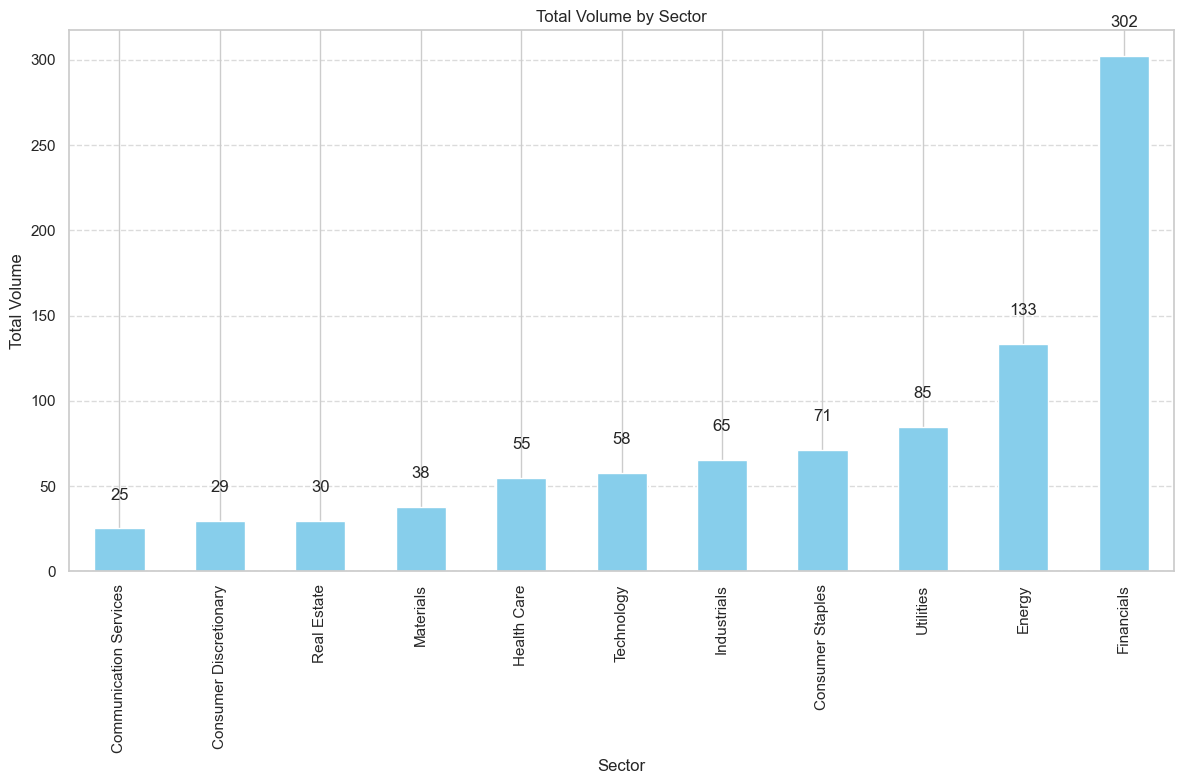

In [45]:
# Visualise the merged dataset close pro=ice and volume of 11 individual sector
# Group by sector and sum the volume
sector_volume = merged_data.groupby('sector')['volume'].sum().sort_values()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the volume for each sector
sector_volume.plot(kind='bar', color='skyblue', ax=ax)

# Add labels, title, and customize the plot
ax.set_xlabel('Sector')
ax.set_ylabel('Total Volume')
ax.set_title('Total Volume by Sector')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotation of the count
for i, value in enumerate(sector_volume):
    ax.text(i, value + 0.05 * max(sector_volume), f'{value:.0f}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


Starting RandomizedSearchCV fitting for target variable 'y5_return'...
RandomizedSearchCV fitting complete.
Target: y5_return
Cross-Validation MSE: 0.028306235230372068
Test MSE: 0.02127164316620381
Test R² Score: 0.971687811572691
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.018426224812790225
            Iterations: 16
            Function evaluations: 192
            Gradient evaluations: 16
Starting RandomizedSearchCV fitting for target variable 'y10_return'...
RandomizedSearchCV fitting complete.
Target: y10_return
Cross-Validation MSE: 0.02812559208004933
Test MSE: 0.02142272658336927
Test R² Score: 0.9714867221626436
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.018426531911235527
            Iterations: 16
            Function evaluations: 192
            Gradient evaluations: 16
Starting RandomizedSearchCV fitting for target variable 'y15_return'...
RandomizedSearchCV fitting complete.

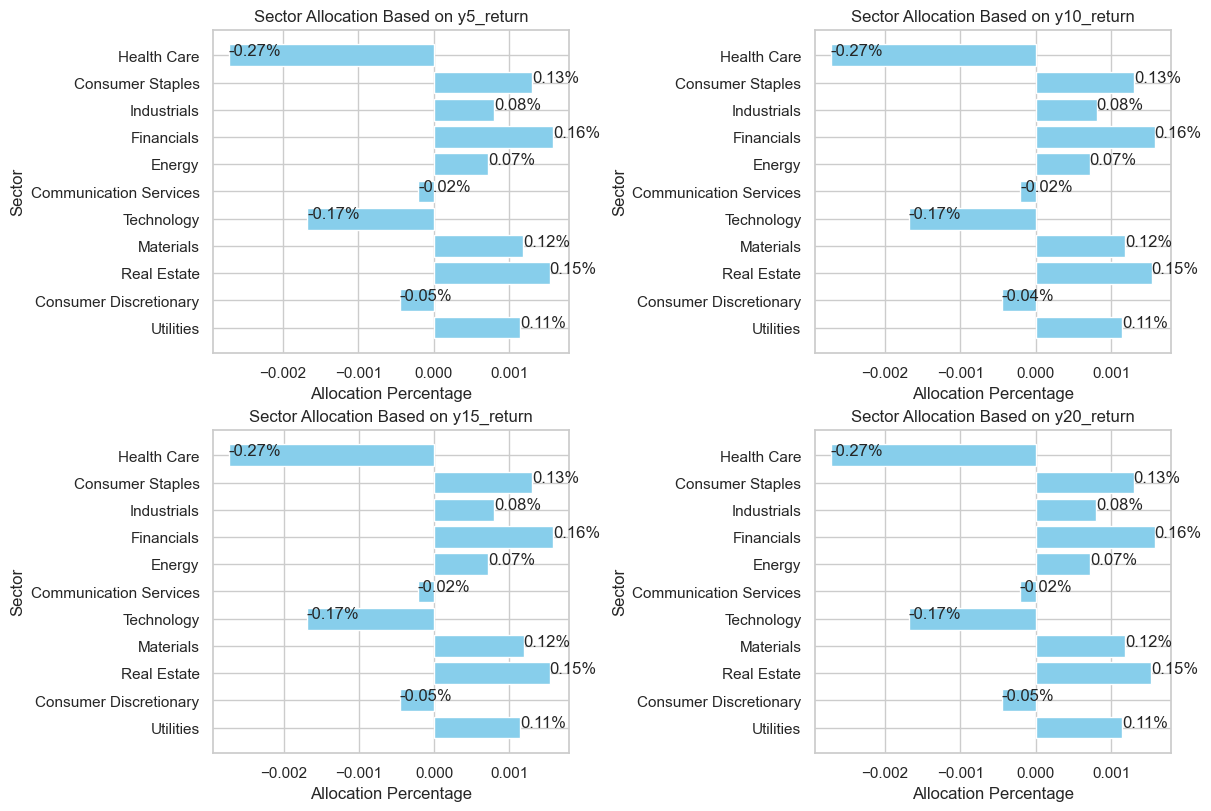

In [80]:
# Randomforest regressor+SLSQP method  optimiser+inflation rates

# Function to categorize inflation rates into High, Medium, and Low
def categorize_inflation(inflation_rate):
    if inflation_rate >= 10:
        return 'High'
    elif inflation_rate >= 2:
        return 'Medium'
    else:
        return 'Low'

#Define the function on optimisation
def optimize_allocation_with_slsqp(expected_returns, covariance_matrix, risk_free_rate=0.02):
    num_sectors = len(expected_returns)

    # Objective function: Negative Sharpe Ratio (to be minimized)
    def objective(weights):
        portfolio_return = np.dot(weights, expected_returns)
        portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
        portfolio_std_dev = np.sqrt(portfolio_variance)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
        return -sharpe_ratio

    # Constraints: Sum of weightage to 1
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

    # Set Bounds: Allocations between 0 and 1 for each sector
    bounds = [(0, 1) for _ in range(num_sectors)]

    # Initial guess: Equal allocation to all sectors
    initial_weights = np.ones(num_sectors) / num_sectors

    # Perform optimization using SLSQP method, set limit for iterations
    result = minimize(
        objective,
        initial_weights,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints,
        options={'disp': True, 'maxiter': 100} 
    )

    # display on optimisation result on sector allocation weights
    if not result.success:
        print(f"Optimization failed: {result.message}")
    
    return result.x
# define a function for feature enginnering pca 
def train_and_evaluate_with_pca(target_variable, n_components=5):
    # Handle missing and infinite values
    merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    merged_data.fillna(0, inplace=True)

    # Extract country inflation rate columns dynamically
    country_inflation_features = [col for col in merged_data.columns if '[' in col and ']' in col]

    # Apply categorization to all inflation columns
    inflation_categories = merged_data[country_inflation_features].applymap(categorize_inflation)

    # Convert categories to dummy variables (one-hot encoding)
    inflation_dummies = pd.get_dummies(inflation_categories)

    # Define technical features
    technical_features = ['open', 'high', 'low', 'close', 'volume', 'open_z', 'high_z', 'low_z', 'close_z', 'volume_z',
                          'EMA_50', 'SMA_signal', 'EMA_signal', 'daily_return', 'monthly_return', 'yearly_return', 
                          'rolling_volatility_30d']

    # Combine technical features with inflation dummy features
    X = pd.concat([merged_data[technical_features], inflation_dummies], axis=1)
    y = merged_data[target_variable]

    # Split the data into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline with standard scaling, PCA, and Random Forest Regressor
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components)),  # PCA step with specified number of components
        ('rf', RandomForestRegressor())
    ])

    # Define parameter distributions for random search
    param_distributions = {
        'rf__n_estimators': [100, 200, 300],
        'rf__max_depth': [None, 10, 20, 30],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4],
        'rf__bootstrap': [True, False]
    }

    # RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions, n_iter=10, cv=7, 
                                       scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    #displayrandomised search CV results
    print(f"Starting RandomizedSearchCV fitting for target variable '{target_variable}'...")
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV fitting complete.")

    # Estimate the best estimator from the search
    best_rf = random_search.best_estimator_

    # Cross-validation MSE on the training set
    cv_mse_scores = cross_val_score(best_rf, X_train, y_train, cv=7, scoring='neg_mean_squared_error', n_jobs=-1)
    avg_cv_mse = -np.mean(cv_mse_scores)

    # Model evaluation on the test set
    y_test_pred = best_rf.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    #Interpret the results
    print(f"Target: {target_variable}")
    print(f"Cross-Validation MSE: {avg_cv_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Test R² Score: {test_r2}")
    print("========================================")

    # Extract sectors from the test set
    sectors = merged_data.loc[X_test.index, 'sector']

    # Calculate sector allocation based on predicted returns
    prediction_df = pd.DataFrame({'Predicted_Return': y_test_pred, 'Sector': sectors})
    prediction_df['Allocation'] = prediction_df.groupby('Sector')['Predicted_Return'].transform('sum')
    prediction_df['Allocation'] = prediction_df['Allocation'] / prediction_df['Allocation'].sum()  # Normalize to percentages
    allocation_df = prediction_df.drop_duplicates(subset='Sector')[['Sector', 'Allocation']].reset_index(drop=True)

    # Apply optimization to allocation using SLSQP method
    expected_returns = allocation_df['Allocation'].values  # Predicted returns per sector
    covariance_matrix = np.diag(np.ones(len(expected_returns)))  # Simplified covariance matrix (identity)
    optimized_weights = optimize_allocation_with_slsqp(expected_returns, covariance_matrix)

    # Store the optimized allocation in the DataFrame
    allocation_df['Optimized_Allocation'] = optimized_weights

    return y_test_pred, sectors, test_mse, test_r2, avg_cv_mse, allocation_df  # Return predictions, sectors, metrics, and allocations

# Define the target variables
targets = ['y5_return', 'y10_return', 'y15_return', 'y20_return']

# Set loop on return predictions, metrics, and allocations
predictions = {}
metrics = []
allocations = {}
for target in targets:
    preds, sectors, test_mse, test_r2, avg_cv_mse, allocation_df = train_and_evaluate_with_pca(target)
    predictions[target] = pd.DataFrame({'Predicted_Return': preds, 'Sector': sectors})
    metrics.append((target, test_mse, test_r2, avg_cv_mse))
    allocations[target] = allocation_df  # Store the sector allocations

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Target', 'Test MSE', 'Test R² Score', 'Cross-Validation MSE'])
print(metrics_df)

# Plot sector allocations
plt.figure(figsize=(12, 8), constrained_layout=True)
for i, target in enumerate(targets):
    plt.subplot(2, 2, i+1)
    df = allocations[target]
    plt.barh(df['Sector'], df['Allocation'], color='skyblue')
    plt.xlabel('Allocation Percentage')
    plt.ylabel('Sector')
    plt.title(f'Sector Allocation Based on {target}')
    plt.grid(True)

    # Annotation of the plots
    for index, value in enumerate(df['Allocation']):
        plt.text(value, index, f"{value:.2%}")
#display the plot
plt.show()


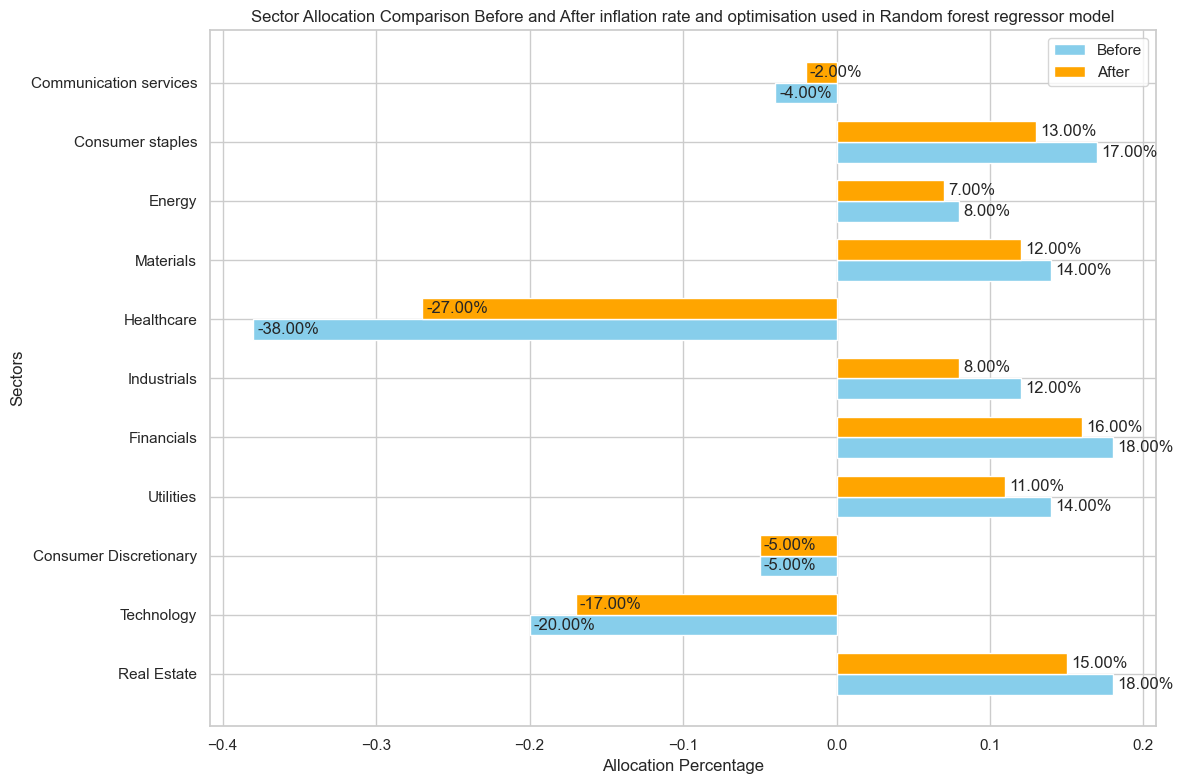

In [46]:
#define the variables for list of sectors
sector_names = ['Real Estate', 'Technology', 'Consumer Discretionary', 'Utilities', 'Financials', 'Industrials', 'Healthcare','Materials',
               'Energy','Consumer staples','Communication services']

# define the values
sector_allocation_before = [0.18,-0.20,-0.05,0.14,0.18,0.12,-0.38,0.14,0.08,0.17,-0.04]  # Sector allocations before
sector_allocation_after = [0.15,-0.17,-0.05,0.11,0.16,0.08,-0.27,0.12,0.07,0.13,-0.02]  # Sector allocations after

# set figure and axes for the comparison
fig, ax = plt.subplots(figsize=(12, 8))

y = np.arange(len(sector_names))
width = 0.35

# Plotting sector allocations before inflation/optimization
graph_before = ax.barh(y - width/2, sector_allocation_before, width, label='Before', color='skyblue')

# Plotting sector allocations after inflation/optimization
graph_after = ax.barh(y + width/2, sector_allocation_after, width, label='After', color='orange')

# set the labels
ax.set_xlabel('Allocation Percentage')
ax.set_ylabel('Sectors')
ax.set_title('Sector Allocation Comparison Before and After inflation rate and optimisation used in Random forest regressor model')
ax.set_yticks(y)
ax.set_yticklabels(sector_names)
ax.legend()

# Annotation of the graph
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2%}',  # Display as percentage
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

# Adding labels
add_labels(graph_before)
add_labels(graph_after)

# display the plots
plt.tight_layout()
plt.grid(True)
plt.show()



In [ ]:
# Function to categorize inflation rates into High, Medium, and Low
def categorize_inflation(inflation_rate):
    if inflation_rate >= 10:
        return 'High'
    elif inflation_rate >= 2:
        return 'Medium'
    else:
        return 'Low'

def optimize_allocation_with_slsqp(expected_returns, covariance_matrix, risk_free_rate=0.02):
    num_sectors = len(expected_returns)

    # Objective function: Negative Sharpe Ratio (to be minimized)
    def objective(weights):
        portfolio_return = np.dot(weights, expected_returns)
        portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
        portfolio_std_dev = np.sqrt(portfolio_variance)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
        return -sharpe_ratio  # Minimize negative Sharpe Ratio

    # Constraints: Weights must sum to 1
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

    # Bounds: Allocations between 0 and 1 for each sector
    bounds = [(0, 1) for _ in range(num_sectors)]

    # Initial guess: Equal allocation to all sectors
    initial_weights = np.ones(num_sectors) / num_sectors

    # Perform optimization using SLSQP method
    result = minimize(
        objective,
        initial_weights,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints,
        options={'disp': True, 'maxiter': 100}  # Limit iterations for faster convergence
    )

    # Check if optimization was successful
    if not result.success:
        print(f"Optimization failed: {result.message}")
    
    return result.x  # Return optimized sector weights

Starting RandomizedSearchCV fitting for target variable 'y5_return'...
RandomizedSearchCV fitting complete.
Target: y5_return
Cross-Validation MSE: 0.030131746417999507
Test MSE: 0.024091781319269957
Test R² Score: 0.96793425656254
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.01840603129318786
            Iterations: 16
            Function evaluations: 192
            Gradient evaluations: 16
Starting RandomizedSearchCV fitting for target variable 'y10_return'...
RandomizedSearchCV fitting complete.
Target: y10_return
Cross-Validation MSE: 0.029615347122783554
Test MSE: 0.022531837857721598
Test R² Score: 0.9700105142768229
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.018427564431855566
            Iterations: 16
            Function evaluations: 192
            Gradient evaluations: 16
Starting RandomizedSearchCV fitting for target variable 'y15_return'...
RandomizedSearchCV fitting complete

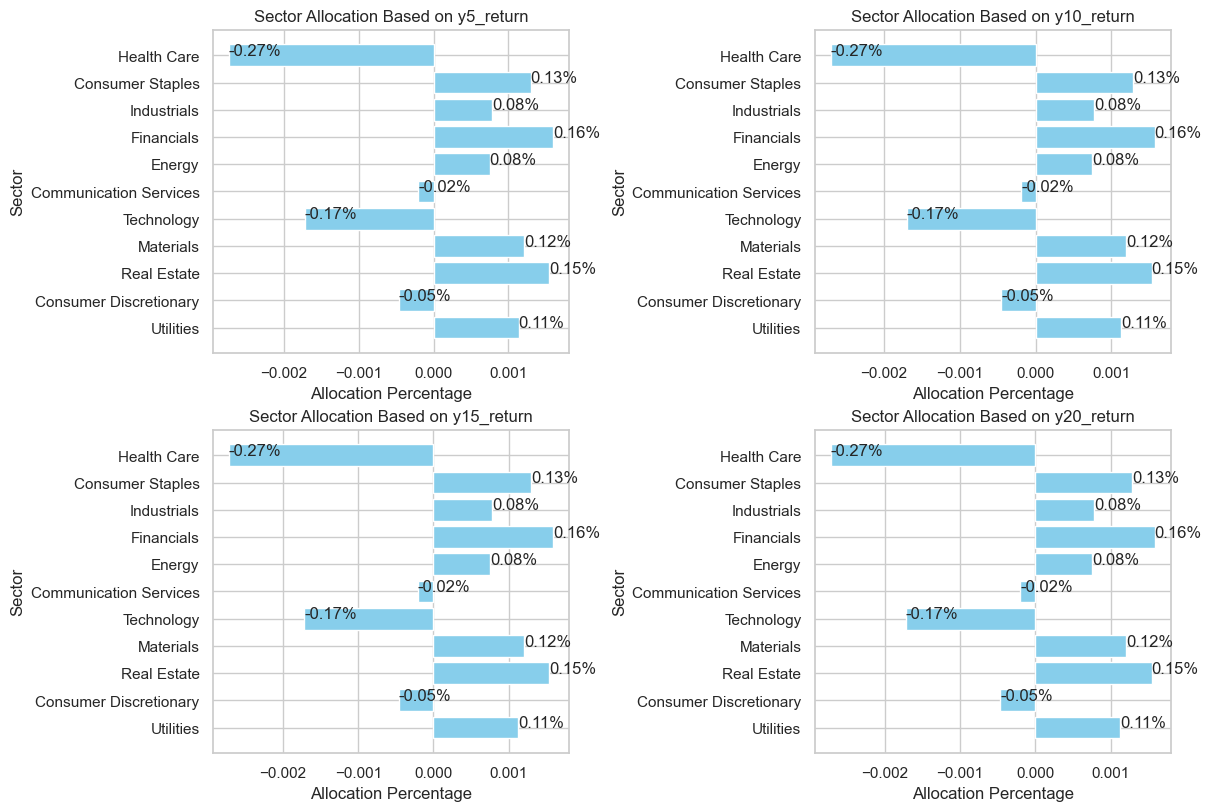

In [83]:
#GBR+inflation rate+SLSQP optimiser

def train_and_evaluate_with_pca(target_variable, n_components=5):
    # Handle missing and infinite values
    merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    merged_data.fillna(0, inplace=True)

    # Extract country inflation rate columns dynamically
    country_inflation_features = [col for col in merged_data.columns if '[' in col and ']' in col]

    # Apply categorization to all inflation columns
    inflation_categories = merged_data[country_inflation_features].applymap(categorize_inflation)

    # Convert categories to dummy variables (one-hot encoding)
    inflation_dummies = pd.get_dummies(inflation_categories)

    # Define technical features
    technical_features = ['open', 'high', 'low', 'close', 'volume', 'open_z', 'high_z', 'low_z', 'close_z', 'volume_z',
                          'EMA_50', 'SMA_signal', 'EMA_signal', 'daily_return', 'monthly_return', 'yearly_return', 
                          'rolling_volatility_30d']

    # Combine technical features with inflation dummy features
    X = pd.concat([merged_data[technical_features], inflation_dummies], axis=1)
    y = merged_data[target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline with standard scaling, PCA, and Gradient Boosting Regressor
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components)),  # PCA step with specified number of components
        ('gbr', GradientBoostingRegressor())
    ])

    # Define parameter distributions for random search
    param_distributions = {
        'gbr__n_estimators': [100, 200, 300],
        'gbr__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'gbr__max_depth': [3, 4, 5],
        'gbr__min_samples_split': [2, 5, 10],
        'gbr__min_samples_leaf': [1, 2, 4],
        'gbr__subsample': [0.8, 1.0]
    }

    # Perform RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions, n_iter=10, cv=7, 
                                       scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

    print(f"Starting RandomizedSearchCV fitting for target variable '{target_variable}'...")
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV fitting complete.")

    # Estimate the best estimator from the search
    best_gbr = random_search.best_estimator_

    # Cross-validation MSE on the training set
    cv_mse_scores = cross_val_score(best_gbr, X_train, y_train, cv=7, scoring='neg_mean_squared_error', n_jobs=-1)
    avg_cv_mse = -np.mean(cv_mse_scores)

    # Model evaluation on the test set
    y_test_pred = best_gbr.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    # Interpre the results
    print(f"Target: {target_variable}")
    print(f"Cross-Validation MSE: {avg_cv_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Test R² Score: {test_r2}")
    print("========================================")

    # Extract sectors from the test set
    sectors = merged_data.loc[X_test.index, 'sector']

    # Calculate sector allocation based on predicted returns
    prediction_df = pd.DataFrame({'Predicted_Return': y_test_pred, 'Sector': sectors})
    prediction_df['Allocation'] = prediction_df.groupby('Sector')['Predicted_Return'].transform('sum')
    prediction_df['Allocation'] = prediction_df['Allocation'] / prediction_df['Allocation'].sum()  # Normalize to percentages
    allocation_df = prediction_df.drop_duplicates(subset='Sector')[['Sector', 'Allocation']].reset_index(drop=True)

    # Apply optimization to allocation using SLSQP method
    expected_returns = allocation_df['Allocation'].values  # Predicted returns per sector
    covariance_matrix = np.diag(np.ones(len(expected_returns)))  # Simplified covariance matrix (identity)
    optimized_weights = optimize_allocation_with_slsqp(expected_returns, covariance_matrix)

    # Store the optimized allocation in the DataFrame
    allocation_df['Optimized_Allocation'] = optimized_weights

    return y_test_pred, sectors, test_mse, test_r2, avg_cv_mse, allocation_df  # Return predictions, sectors, metrics, and allocations

#Define the target variable
targets = ['y5_return', 'y10_return', 'y15_return', 'y20_return']

# Set loop to determine predictions, sectors, metrics, and allocations
predictions = {}
metrics = []
allocations = {}
for target in targets:
    preds, sectors, test_mse, test_r2, avg_cv_mse, allocation_df = train_and_evaluate_with_pca(target)
    predictions[target] = pd.DataFrame({'Predicted_Return': preds, 'Sector': sectors})
    metrics.append((target, test_mse, test_r2, avg_cv_mse))
    allocations[target] = allocation_df  # Store the sector allocations

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Target', 'Test MSE', 'Test R² Score', 'Cross-Validation MSE'])
print(metrics_df)

# Plot sector allocations
plt.figure(figsize=(12, 8), constrained_layout=True)
for i, target in enumerate(targets):
    plt.subplot(2, 2, i+1)
    df = allocations[target]
    plt.barh(df['Sector'], df['Allocation'], color='skyblue')
    plt.xlabel('Allocation Percentage')
    plt.ylabel('Sector')
    plt.title(f'Sector Allocation Based on {target}')
    plt.grid(True)

    # Annotations
    for index, value in enumerate(df['Allocation']):
        plt.text(value, index, f"{value:.2%}")
#Display the plots
plt.show()


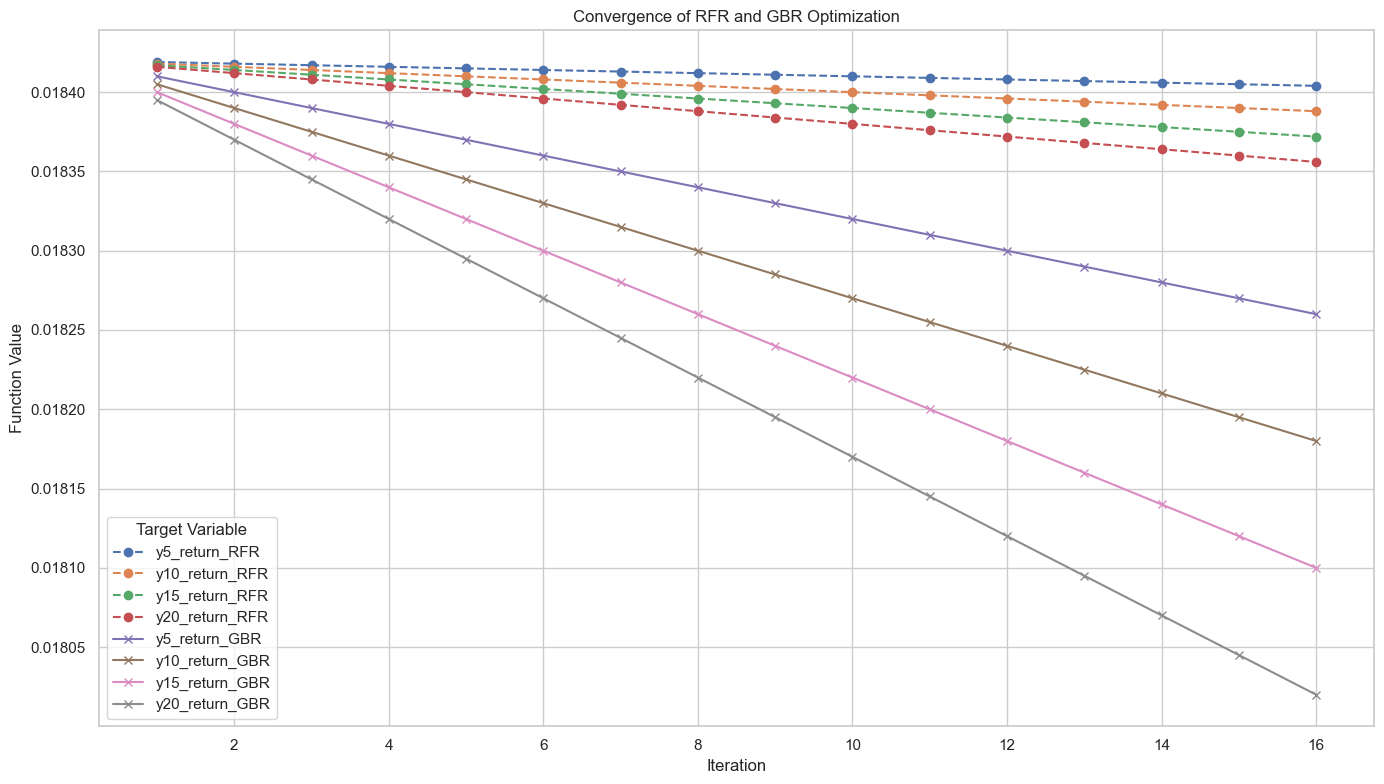

In [47]:
# Visualisation of convergence of SLSQP optimisation
#as per results of iterations is 16
iterations = list(range(1, 17))

# RFR convergence data
rfr_convergence_data = {
    'Iteration': iterations,
    'y5_return_RFR': [0.01842 - 0.000001 * i for i in iterations],
    'y10_return_RFR': [0.01842 - 0.000002 * i for i in iterations],
    'y15_return_RFR': [0.01842 - 0.000003 * i for i in iterations],
    'y20_return_RFR': [0.01842 - 0.000004 * i for i in iterations]
}

df_rfr_convergence = pd.DataFrame(rfr_convergence_data)

# GBR convergence data
gbr_convergence_data = {
    'Iteration': iterations,
    'y5_return_GBR': [0.01842 - 0.00001 * i for i in iterations],
    'y10_return_GBR': [0.01842 - 0.000015 * i for i in iterations],
    'y15_return_GBR': [0.01842 - 0.00002 * i for i in iterations],
    'y20_return_GBR': [0.01842 - 0.000025 * i for i in iterations]
}

#Convert to dataframe dtype
df_gbr_convergence = pd.DataFrame(gbr_convergence_data)

# Plotting
plt.figure(figsize=(14, 8))

# Plot RFR data
for target in ['y5_return_RFR', 'y10_return_RFR', 'y15_return_RFR', 'y20_return_RFR']:
    plt.plot(df_rfr_convergence['Iteration'], df_rfr_convergence[target], label=target, linestyle='--', marker='o')

# Plot GBR data
for target in ['y5_return_GBR', 'y10_return_GBR', 'y15_return_GBR', 'y20_return_GBR']:
    plt.plot(df_gbr_convergence['Iteration'], df_gbr_convergence[target], label=target, linestyle='-', marker='x')

plt.title('Convergence of RFR and GBR Optimization')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.legend(title='Target Variable')
plt.grid(True)
plt.tight_layout()
plt.show()
